## Setup
The following few lines setup the codes we'll need

In [1]:
using ApproxFun # if this isn't there, use Pkg.add("ApproxFun")

In [2]:
include("simple_gradient_descent.jl")

gradient_descent_2

In [3]:
using OptimTestProblems
rosen = MultivariateProblems.UnconstrainedProblems.examples["Rosenbrock"]

OptimTestProblems.MultivariateProblems.OptimizationProblem{Nothing, Nothing, Float64, String, Nothing}("Rosenbrock", OptimTestProblems.MultivariateProblems.UnconstrainedProblems.rosenbrock, OptimTestProblems.MultivariateProblems.UnconstrainedProblems.rosenbrock_gradient!, nothing, OptimTestProblems.MultivariateProblems.UnconstrainedProblems.rosenbrock_hessian!, nothing, [-1.2, 1.0], [1.0, 1.0], 0.0, true, true, nothing)

In [4]:
# These codes turn f and g into one function ... 
function opt_combine(x, f, g!)
    g = Vector{Float64}(undef, length(x))
    g!(g, x)
    return (f(x), g)
end
function opt_problem(p)
    return x -> opt_combine(x, p.f, p.g!)
end
# this just makes it easy to use
opt_problem(s::AbstractString) = opt_problem(
    MultivariateProblems.UnconstrainedProblems.examples[s])

# Here's an example 
fg = opt_problem("Rosenbrock")
f, g = fg([0.0,0.0]) # show the function and gradient

(1.0, [-2.0, 0.0])

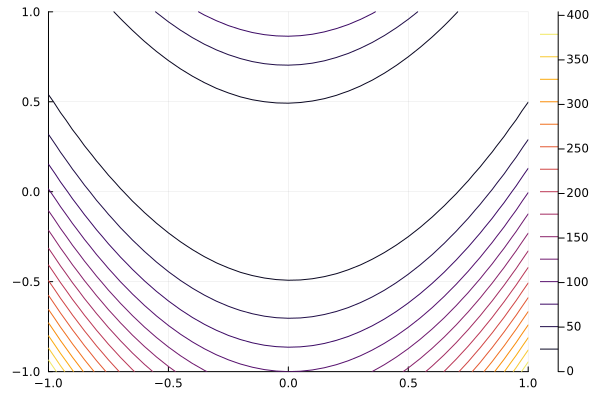

In [8]:
using Plots
ezcontour(x, y, f) = begin
    X = repeat(x', length(y), 1)
    Y = repeat(y, 1, length(x))
    # Evaluate each f(x, y)
    Z = map((x,y) -> f([x,y]), X, Y)
    plot(x, y, Z, st=:contour)
end
ezcontour(-1:0.05:1, -1:0.05:1, 
    MultivariateProblems.UnconstrainedProblems.examples["Rosenbrock"].f)

## Working on the Rosenbrock function

In [5]:
# Try using xnext = xk - gradient(xk)
fg = opt_problem("Rosenbrock")
histx = Vector{Vector{Float64}}()
x,fx,gx,hist = gradient_descent_1(fg, [0.0,0.0]; 
    maxiter=5000, histx=histx, gamma = 1.0)

    iter        val     normg     fdiff
       1   1.00e+00  2.00e+00       Inf
       2   1.60e+03  3.20e+03 -1.60e+03
       3   1.05e+16  1.31e+13 -1.05e+16
       4   2.95e+54  9.01e+41 -2.95e+54
       5  6.58e+169 2.92e+128 -6.58e+169
       6        Inf       Inf      -Inf


┌ Warning: Did not converge
└ @ Main ~/Dropbox/courses/cs520-2023/web/input/julia/simple_gradient_descent.jl:92


([2.920948686551318e128, 1.6218323288467292e86], Inf, [Inf, -1.7063882458931737e259], [1.0 1601.0 … 6.575850257231013e169 Inf; 2.0 3202.0 … 2.920948686551318e128 Inf])

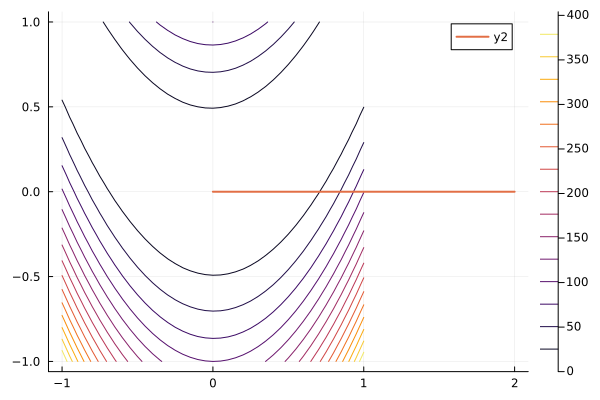

In [9]:
ezcontour(-1:0.05:1, -1:0.05:1, 
MultivariateProblems.UnconstrainedProblems.examples["Rosenbrock"].f)
histx = histx[1:3]
plot!(map(first,histx),map(x->x[2], histx), linewidth=2)

In [10]:
# Try using xnext = xk - 0.01*gradient(xk)
fg = opt_problem("Rosenbrock")
histx = Vector{Vector{Float64}}()
x,fx,gx,hist = gradient_descent_1(fg, [0.0,0.0]; 
    maxiter=5000, histx=histx, gamma = 0.01)

    iter        val     normg     fdiff
       1   1.00e+00  2.00e+00       Inf
       2   9.60e-01  1.96e+00  3.96e-02
       3   9.22e-01  1.91e+00  3.79e-02
       4   8.86e-01  1.86e+00  3.62e-02
       5   8.52e-01  1.80e+00  3.45e-02
       6   8.19e-01  1.74e+00  3.28e-02
       7   7.88e-01  1.69e+00  3.12e-02
       8   7.58e-01  1.63e+00  2.96e-02
       9   7.30e-01  1.57e+00  2.80e-02
      10   7.04e-01  1.52e+00  2.65e-02
      11   6.78e-01  1.46e+00  2.51e-02
      12   6.55e-01  1.41e+00  2.38e-02
      13   6.32e-01  1.36e+00  2.25e-02
      14   6.11e-01  1.31e+00  2.13e-02
      15   5.91e-01  1.26e+00  2.02e-02
      16   5.71e-01  1.21e+00  1.92e-02
      17   5.53e-01  1.17e+00  1.82e-02
      18   5.36e-01  1.13e+00  1.73e-02
      19   5.20e-01  1.10e+00  1.64e-02
      20   5.04e-01  1.04e+00  1.56e-02
      21   4.89e-01  1.04e+00  1.49e-02
      22   4.75e-01  9.43e-01  1.41e-02
      23   4.62e-01  1.04e+00  1.35e-02
      24   4.49e-01  8.57e-01  1.28e-02


┌ Warning: Did not converge
└ @ Main ~/Dropbox/courses/cs520-2023/web/input/julia/simple_gradient_descent.jl:92


([1.453328724172908e178, 4.726785626727865e118], Inf, [Inf, -Inf], [1.0 0.9604159999999999 … 5.585625590260283e238 Inf; 2.0 1.9567999999999999 … 1.453328724172908e180 Inf])

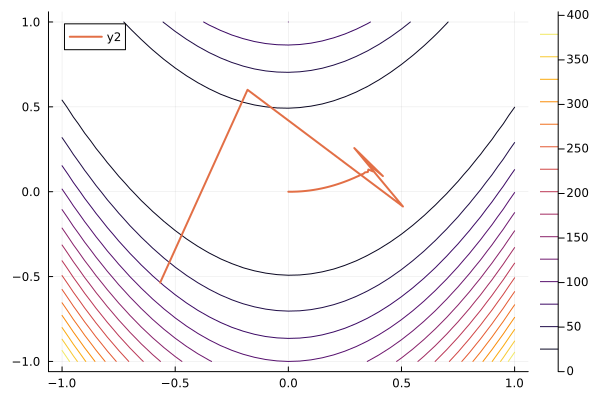

In [11]:
ezcontour(-1:0.05:1, -1:0.05:1, 
MultivariateProblems.UnconstrainedProblems.examples["Rosenbrock"].f)
histx = histx[1:35]
plot!(map(first,histx),map(x->x[2], histx), linewidth=2)

In [24]:
# Try using xnext = xk - 0.0001*gradient(xk)
fg = opt_problem("Rosenbrock")
histx = Vector{Vector{Float64}}()
x,fx,gx,hist = gradient_descent_1(fg, [0.0,0.0]; 
    maxiter=25000, histx=histx, gamma = 0.0001)

    iter        val     normg     fdiff
       1   1.00e+00  2.00e+00       Inf
       2   1.00e+00  2.00e+00  4.00e-04
       3   9.99e-01  2.00e+00  4.00e-04
       4   9.99e-01  2.00e+00  4.00e-04
       5   9.98e-01  2.00e+00  3.99e-04
       6   9.98e-01  2.00e+00  3.99e-04
       7   9.98e-01  2.00e+00  3.99e-04
       8   9.97e-01  2.00e+00  3.99e-04
       9   9.97e-01  2.00e+00  3.99e-04
      10   9.96e-01  2.00e+00  3.99e-04
      11   9.96e-01  2.00e+00  3.99e-04
      12   9.96e-01  2.00e+00  3.98e-04
      13   9.95e-01  2.00e+00  3.98e-04
      14   9.95e-01  1.99e+00  3.98e-04
      15   9.94e-01  1.99e+00  3.98e-04
      16   9.94e-01  1.99e+00  3.98e-04
      17   9.94e-01  1.99e+00  3.98e-04
      18   9.93e-01  1.99e+00  3.97e-04
      19   9.93e-01  1.99e+00  3.97e-04
      20   9.92e-01  1.99e+00  3.97e-04
      21   9.92e-01  1.99e+00  3.97e-04
      22   9.92e-01  1.99e+00  3.97e-04
      23   9.91e-01  1.99e+00  3.97e-04
      24   9.91e-01  1.99e+00  3.96e-04


     256   9.03e-01  1.89e+00  3.58e-04
     257   9.03e-01  1.89e+00  3.58e-04
     258   9.03e-01  1.88e+00  3.58e-04
     259   9.02e-01  1.88e+00  3.58e-04
     260   9.02e-01  1.88e+00  3.57e-04
     261   9.02e-01  1.88e+00  3.57e-04
     262   9.01e-01  1.88e+00  3.57e-04
     263   9.01e-01  1.88e+00  3.57e-04
     264   9.00e-01  1.88e+00  3.57e-04
     265   9.00e-01  1.88e+00  3.56e-04
     266   9.00e-01  1.88e+00  3.56e-04
     267   8.99e-01  1.88e+00  3.56e-04
     268   8.99e-01  1.88e+00  3.56e-04
     269   8.99e-01  1.88e+00  3.56e-04
     270   8.98e-01  1.88e+00  3.56e-04
     271   8.98e-01  1.88e+00  3.55e-04
     272   8.98e-01  1.88e+00  3.55e-04
     273   8.97e-01  1.88e+00  3.55e-04
     274   8.97e-01  1.88e+00  3.55e-04
     275   8.97e-01  1.88e+00  3.55e-04
     276   8.96e-01  1.88e+00  3.55e-04
     277   8.96e-01  1.87e+00  3.54e-04
     278   8.95e-01  1.87e+00  3.54e-04
     279   8.95e-01  1.87e+00  3.54e-04
     280   8.95e-01  1.87e+00  3.54e-04


     512   8.17e-01  1.75e+00  3.15e-04
     513   8.17e-01  1.75e+00  3.15e-04
     514   8.17e-01  1.75e+00  3.15e-04
     515   8.16e-01  1.75e+00  3.15e-04
     516   8.16e-01  1.75e+00  3.15e-04
     517   8.16e-01  1.75e+00  3.14e-04
     518   8.15e-01  1.74e+00  3.14e-04
     519   8.15e-01  1.74e+00  3.14e-04
     520   8.15e-01  1.74e+00  3.14e-04
     521   8.14e-01  1.74e+00  3.14e-04
     522   8.14e-01  1.74e+00  3.14e-04
     523   8.14e-01  1.74e+00  3.14e-04
     524   8.13e-01  1.74e+00  3.13e-04
     525   8.13e-01  1.74e+00  3.13e-04
     526   8.13e-01  1.74e+00  3.13e-04
     527   8.12e-01  1.74e+00  3.13e-04
     528   8.12e-01  1.74e+00  3.13e-04
     529   8.12e-01  1.74e+00  3.13e-04
     530   8.12e-01  1.74e+00  3.12e-04
     531   8.11e-01  1.74e+00  3.12e-04
     532   8.11e-01  1.74e+00  3.12e-04
     533   8.11e-01  1.74e+00  3.12e-04
     534   8.10e-01  1.74e+00  3.12e-04
     535   8.10e-01  1.74e+00  3.12e-04
     536   8.10e-01  1.73e+00  3.11e-04


     768   7.42e-01  1.60e+00  2.75e-04
     769   7.41e-01  1.60e+00  2.75e-04
     770   7.41e-01  1.60e+00  2.75e-04
     771   7.41e-01  1.60e+00  2.75e-04
     772   7.41e-01  1.60e+00  2.75e-04
     773   7.40e-01  1.60e+00  2.75e-04
     774   7.40e-01  1.60e+00  2.74e-04
     775   7.40e-01  1.60e+00  2.74e-04
     776   7.39e-01  1.60e+00  2.74e-04
     777   7.39e-01  1.60e+00  2.74e-04
     778   7.39e-01  1.60e+00  2.74e-04
     779   7.39e-01  1.60e+00  2.74e-04
     780   7.38e-01  1.60e+00  2.74e-04
     781   7.38e-01  1.60e+00  2.73e-04
     782   7.38e-01  1.60e+00  2.73e-04
     783   7.38e-01  1.59e+00  2.73e-04
     784   7.37e-01  1.59e+00  2.73e-04
     785   7.37e-01  1.59e+00  2.73e-04
     786   7.37e-01  1.59e+00  2.73e-04
     787   7.36e-01  1.59e+00  2.73e-04
     788   7.36e-01  1.59e+00  2.72e-04
     789   7.36e-01  1.59e+00  2.72e-04
     790   7.36e-01  1.59e+00  2.72e-04
     791   7.35e-01  1.59e+00  2.72e-04
     792   7.35e-01  1.59e+00  2.72e-04


    1184   6.39e-01  1.38e+00  2.20e-04
    1185   6.39e-01  1.38e+00  2.20e-04
    1186   6.39e-01  1.38e+00  2.20e-04
    1187   6.38e-01  1.38e+00  2.20e-04
    1188   6.38e-01  1.38e+00  2.19e-04
    1189   6.38e-01  1.38e+00  2.19e-04
    1190   6.38e-01  1.38e+00  2.19e-04
    1191   6.38e-01  1.38e+00  2.19e-04
    1192   6.37e-01  1.37e+00  2.19e-04
    1193   6.37e-01  1.37e+00  2.19e-04
    1194   6.37e-01  1.37e+00  2.19e-04
    1195   6.37e-01  1.37e+00  2.19e-04
    1196   6.36e-01  1.37e+00  2.19e-04
    1197   6.36e-01  1.37e+00  2.18e-04
    1198   6.36e-01  1.37e+00  2.18e-04
    1199   6.36e-01  1.37e+00  2.18e-04
    1200   6.36e-01  1.37e+00  2.18e-04
    1201   6.35e-01  1.37e+00  2.18e-04
    1202   6.35e-01  1.37e+00  2.18e-04
    1203   6.35e-01  1.37e+00  2.18e-04
    1204   6.35e-01  1.37e+00  2.18e-04
    1205   6.35e-01  1.37e+00  2.17e-04
    1206   6.34e-01  1.37e+00  2.17e-04
    1207   6.34e-01  1.37e+00  2.17e-04
    1208   6.34e-01  1.37e+00  2.17e-04


    1440   5.87e-01  1.26e+00  1.92e-04
    1441   5.86e-01  1.26e+00  1.92e-04
    1442   5.86e-01  1.26e+00  1.92e-04
    1443   5.86e-01  1.25e+00  1.92e-04
    1444   5.86e-01  1.25e+00  1.92e-04
    1445   5.86e-01  1.25e+00  1.92e-04
    1446   5.85e-01  1.25e+00  1.91e-04
    1447   5.85e-01  1.25e+00  1.91e-04
    1448   5.85e-01  1.25e+00  1.91e-04
    1449   5.85e-01  1.25e+00  1.91e-04
    1450   5.85e-01  1.25e+00  1.91e-04
    1451   5.84e-01  1.25e+00  1.91e-04
    1452   5.84e-01  1.25e+00  1.91e-04
    1453   5.84e-01  1.25e+00  1.91e-04
    1454   5.84e-01  1.25e+00  1.91e-04
    1455   5.84e-01  1.25e+00  1.91e-04
    1456   5.83e-01  1.25e+00  1.90e-04
    1457   5.83e-01  1.25e+00  1.90e-04
    1458   5.83e-01  1.25e+00  1.90e-04
    1459   5.83e-01  1.25e+00  1.90e-04
    1460   5.83e-01  1.25e+00  1.90e-04
    1461   5.82e-01  1.25e+00  1.90e-04
    1462   5.82e-01  1.25e+00  1.90e-04
    1463   5.82e-01  1.25e+00  1.90e-04
    1464   5.82e-01  1.25e+00  1.90e-04


    1696   5.40e-01  1.15e+00  1.68e-04
    1697   5.40e-01  1.15e+00  1.68e-04
    1698   5.40e-01  1.15e+00  1.68e-04
    1699   5.40e-01  1.15e+00  1.68e-04
    1700   5.40e-01  1.15e+00  1.68e-04
    1701   5.40e-01  1.15e+00  1.68e-04
    1702   5.39e-01  1.14e+00  1.68e-04
    1703   5.39e-01  1.14e+00  1.68e-04
    1704   5.39e-01  1.14e+00  1.68e-04
    1705   5.39e-01  1.14e+00  1.68e-04
    1706   5.39e-01  1.14e+00  1.68e-04
    1707   5.39e-01  1.14e+00  1.67e-04
    1708   5.38e-01  1.14e+00  1.67e-04
    1709   5.38e-01  1.14e+00  1.67e-04
    1710   5.38e-01  1.14e+00  1.67e-04
    1711   5.38e-01  1.14e+00  1.67e-04
    1712   5.38e-01  1.14e+00  1.67e-04
    1713   5.38e-01  1.14e+00  1.67e-04
    1714   5.37e-01  1.14e+00  1.67e-04
    1715   5.37e-01  1.14e+00  1.67e-04
    1716   5.37e-01  1.14e+00  1.67e-04
    1717   5.37e-01  1.14e+00  1.67e-04
    1718   5.37e-01  1.14e+00  1.67e-04
    1719   5.37e-01  1.14e+00  1.66e-04
    1720   5.36e-01  1.14e+00  1.66e-04


    1952   5.00e-01  1.05e+00  1.48e-04
    1953   5.00e-01  1.05e+00  1.48e-04
    1954   5.00e-01  1.05e+00  1.48e-04
    1955   5.00e-01  1.05e+00  1.48e-04
    1956   4.99e-01  1.05e+00  1.48e-04
    1957   4.99e-01  1.05e+00  1.48e-04
    1958   4.99e-01  1.05e+00  1.48e-04
    1959   4.99e-01  1.05e+00  1.48e-04
    1960   4.99e-01  1.05e+00  1.48e-04
    1961   4.99e-01  1.05e+00  1.48e-04
    1962   4.98e-01  1.05e+00  1.48e-04
    1963   4.98e-01  1.05e+00  1.48e-04
    1964   4.98e-01  1.05e+00  1.48e-04
    1965   4.98e-01  1.05e+00  1.48e-04
    1966   4.98e-01  1.05e+00  1.47e-04
    1967   4.98e-01  1.05e+00  1.47e-04
    1968   4.98e-01  1.05e+00  1.47e-04
    1969   4.97e-01  1.05e+00  1.47e-04
    1970   4.97e-01  1.04e+00  1.47e-04
    1971   4.97e-01  1.04e+00  1.47e-04
    1972   4.97e-01  1.04e+00  1.47e-04
    1973   4.97e-01  1.04e+00  1.47e-04
    1974   4.97e-01  1.04e+00  1.47e-04
    1975   4.97e-01  1.04e+00  1.47e-04
    1976   4.96e-01  1.04e+00  1.47e-04


    2208   4.64e-01  9.67e-01  1.32e-04
    2209   4.64e-01  9.66e-01  1.32e-04
    2210   4.64e-01  9.66e-01  1.32e-04
    2211   4.64e-01  9.66e-01  1.31e-04
    2212   4.64e-01  9.65e-01  1.31e-04
    2213   4.64e-01  9.65e-01  1.31e-04
    2214   4.63e-01  9.65e-01  1.31e-04
    2215   4.63e-01  9.64e-01  1.31e-04
    2216   4.63e-01  9.64e-01  1.31e-04
    2217   4.63e-01  9.64e-01  1.31e-04
    2218   4.63e-01  9.63e-01  1.31e-04
    2219   4.63e-01  9.63e-01  1.31e-04
    2220   4.63e-01  9.63e-01  1.31e-04
    2221   4.62e-01  9.63e-01  1.31e-04
    2222   4.62e-01  9.62e-01  1.31e-04
    2223   4.62e-01  9.62e-01  1.31e-04
    2224   4.62e-01  9.62e-01  1.31e-04
    2225   4.62e-01  9.61e-01  1.31e-04
    2226   4.62e-01  9.61e-01  1.31e-04
    2227   4.62e-01  9.61e-01  1.31e-04
    2228   4.62e-01  9.60e-01  1.30e-04
    2229   4.61e-01  9.60e-01  1.30e-04
    2230   4.61e-01  9.60e-01  1.30e-04
    2231   4.61e-01  9.60e-01  1.30e-04
    2232   4.61e-01  9.59e-01  1.30e-04


    2464   4.32e-01  8.92e-01  1.17e-04
    2465   4.32e-01  8.92e-01  1.17e-04
    2466   4.32e-01  8.92e-01  1.17e-04
    2467   4.32e-01  8.92e-01  1.17e-04
    2468   4.32e-01  8.91e-01  1.17e-04
    2469   4.32e-01  8.91e-01  1.17e-04
    2470   4.32e-01  8.91e-01  1.17e-04
    2471   4.32e-01  8.91e-01  1.17e-04
    2472   4.31e-01  8.90e-01  1.17e-04
    2473   4.31e-01  8.90e-01  1.17e-04
    2474   4.31e-01  8.90e-01  1.17e-04
    2475   4.31e-01  8.89e-01  1.17e-04
    2476   4.31e-01  8.89e-01  1.17e-04
    2477   4.31e-01  8.89e-01  1.17e-04
    2478   4.31e-01  8.89e-01  1.17e-04
    2479   4.31e-01  8.88e-01  1.17e-04
    2480   4.31e-01  8.88e-01  1.17e-04
    2481   4.30e-01  8.88e-01  1.16e-04
    2482   4.30e-01  8.88e-01  1.16e-04
    2483   4.30e-01  8.87e-01  1.16e-04
    2484   4.30e-01  8.87e-01  1.16e-04
    2485   4.30e-01  8.87e-01  1.16e-04
    2486   4.30e-01  8.86e-01  1.16e-04
    2487   4.30e-01  8.86e-01  1.16e-04
    2488   4.30e-01  8.86e-01  1.16e-04


    2720   4.04e-01  8.27e-01  1.05e-04
    2721   4.04e-01  8.27e-01  1.05e-04
    2722   4.04e-01  8.27e-01  1.05e-04
    2723   4.04e-01  8.26e-01  1.05e-04
    2724   4.04e-01  8.26e-01  1.05e-04
    2725   4.03e-01  8.26e-01  1.05e-04
    2726   4.03e-01  8.26e-01  1.05e-04
    2727   4.03e-01  8.25e-01  1.05e-04
    2728   4.03e-01  8.25e-01  1.05e-04
    2729   4.03e-01  8.25e-01  1.05e-04
    2730   4.03e-01  8.25e-01  1.05e-04
    2731   4.03e-01  8.25e-01  1.05e-04
    2732   4.03e-01  8.24e-01  1.05e-04
    2733   4.03e-01  8.24e-01  1.05e-04
    2734   4.02e-01  8.24e-01  1.05e-04
    2735   4.02e-01  8.24e-01  1.05e-04
    2736   4.02e-01  8.23e-01  1.04e-04
    2737   4.02e-01  8.23e-01  1.04e-04
    2738   4.02e-01  8.23e-01  1.04e-04
    2739   4.02e-01  8.23e-01  1.04e-04
    2740   4.02e-01  8.22e-01  1.04e-04
    2741   4.02e-01  8.22e-01  1.04e-04
    2742   4.02e-01  8.22e-01  1.04e-04
    2743   4.02e-01  8.22e-01  1.04e-04
    2744   4.01e-01  8.21e-01  1.04e-04


    2976   3.78e-01  7.69e-01  9.47e-05
    2977   3.78e-01  7.69e-01  9.47e-05
    2978   3.78e-01  7.69e-01  9.46e-05
    2979   3.78e-01  7.69e-01  9.46e-05
    2980   3.78e-01  7.69e-01  9.46e-05
    2981   3.78e-01  7.68e-01  9.45e-05
    2982   3.78e-01  7.68e-01  9.45e-05
    2983   3.78e-01  7.68e-01  9.45e-05
    2984   3.78e-01  7.68e-01  9.44e-05
    2985   3.78e-01  7.68e-01  9.44e-05
    2986   3.77e-01  7.67e-01  9.43e-05
    2987   3.77e-01  7.67e-01  9.43e-05
    2988   3.77e-01  7.67e-01  9.43e-05
    2989   3.77e-01  7.67e-01  9.42e-05
    2990   3.77e-01  7.67e-01  9.42e-05
    2991   3.77e-01  7.66e-01  9.42e-05
    2992   3.77e-01  7.66e-01  9.41e-05
    2993   3.77e-01  7.66e-01  9.41e-05
    2994   3.77e-01  7.66e-01  9.40e-05
    2995   3.77e-01  7.65e-01  9.40e-05
    2996   3.77e-01  7.65e-01  9.40e-05
    2997   3.76e-01  7.65e-01  9.39e-05
    2998   3.76e-01  7.65e-01  9.39e-05
    2999   3.76e-01  7.65e-01  9.39e-05
    3000   3.76e-01  7.64e-01  9.38e-05


    3232   3.55e-01  7.18e-01  8.57e-05
    3233   3.55e-01  7.18e-01  8.57e-05
    3234   3.55e-01  7.18e-01  8.56e-05
    3235   3.55e-01  7.18e-01  8.56e-05
    3236   3.55e-01  7.18e-01  8.56e-05
    3237   3.55e-01  7.17e-01  8.55e-05
    3238   3.55e-01  7.17e-01  8.55e-05
    3239   3.55e-01  7.17e-01  8.55e-05
    3240   3.55e-01  7.17e-01  8.54e-05
    3241   3.55e-01  7.17e-01  8.54e-05
    3242   3.54e-01  7.16e-01  8.54e-05
    3243   3.54e-01  7.16e-01  8.53e-05
    3244   3.54e-01  7.16e-01  8.53e-05
    3245   3.54e-01  7.16e-01  8.53e-05
    3246   3.54e-01  7.16e-01  8.52e-05
    3247   3.54e-01  7.16e-01  8.52e-05
    3248   3.54e-01  7.15e-01  8.52e-05
    3249   3.54e-01  7.15e-01  8.52e-05
    3250   3.54e-01  7.15e-01  8.51e-05
    3251   3.54e-01  7.15e-01  8.51e-05
    3252   3.54e-01  7.15e-01  8.51e-05
    3253   3.54e-01  7.14e-01  8.50e-05
    3254   3.53e-01  7.14e-01  8.50e-05
    3255   3.53e-01  7.14e-01  8.50e-05
    3256   3.53e-01  7.14e-01  8.49e-05


    3488   3.34e-01  6.73e-01  7.79e-05
    3489   3.34e-01  6.73e-01  7.79e-05
    3490   3.34e-01  6.72e-01  7.78e-05
    3491   3.34e-01  6.72e-01  7.78e-05
    3492   3.34e-01  6.72e-01  7.78e-05
    3493   3.34e-01  6.72e-01  7.77e-05
    3494   3.34e-01  6.72e-01  7.77e-05
    3495   3.34e-01  6.72e-01  7.77e-05
    3496   3.34e-01  6.71e-01  7.77e-05
    3497   3.34e-01  6.71e-01  7.76e-05
    3498   3.34e-01  6.71e-01  7.76e-05
    3499   3.34e-01  6.71e-01  7.76e-05
    3500   3.33e-01  6.71e-01  7.75e-05
    3501   3.33e-01  6.71e-01  7.75e-05
    3502   3.33e-01  6.70e-01  7.75e-05
    3503   3.33e-01  6.70e-01  7.75e-05
    3504   3.33e-01  6.70e-01  7.74e-05
    3505   3.33e-01  6.70e-01  7.74e-05
    3506   3.33e-01  6.70e-01  7.74e-05
    3507   3.33e-01  6.70e-01  7.73e-05
    3508   3.33e-01  6.69e-01  7.73e-05
    3509   3.33e-01  6.69e-01  7.73e-05
    3510   3.33e-01  6.69e-01  7.73e-05
    3511   3.33e-01  6.69e-01  7.72e-05
    3512   3.33e-01  6.69e-01  7.72e-05


    3744   3.15e-01  6.32e-01  7.11e-05
    3745   3.15e-01  6.32e-01  7.10e-05
    3746   3.15e-01  6.32e-01  7.10e-05
    3747   3.15e-01  6.32e-01  7.10e-05
    3748   3.15e-01  6.31e-01  7.10e-05
    3749   3.15e-01  6.31e-01  7.09e-05
    3750   3.15e-01  6.31e-01  7.09e-05
    3751   3.15e-01  6.31e-01  7.09e-05
    3752   3.15e-01  6.31e-01  7.09e-05
    3753   3.15e-01  6.31e-01  7.08e-05
    3754   3.15e-01  6.30e-01  7.08e-05
    3755   3.15e-01  6.30e-01  7.08e-05
    3756   3.15e-01  6.30e-01  7.08e-05
    3757   3.14e-01  6.30e-01  7.07e-05
    3758   3.14e-01  6.30e-01  7.07e-05
    3759   3.14e-01  6.30e-01  7.07e-05
    3760   3.14e-01  6.30e-01  7.07e-05
    3761   3.14e-01  6.29e-01  7.06e-05
    3762   3.14e-01  6.29e-01  7.06e-05
    3763   3.14e-01  6.29e-01  7.06e-05
    3764   3.14e-01  6.29e-01  7.06e-05
    3765   3.14e-01  6.29e-01  7.05e-05
    3766   3.14e-01  6.29e-01  7.05e-05
    3767   3.14e-01  6.29e-01  7.05e-05
    3768   3.14e-01  6.28e-01  7.05e-05


    4000   2.98e-01  5.95e-01  6.51e-05
    4001   2.98e-01  5.95e-01  6.51e-05
    4002   2.98e-01  5.95e-01  6.50e-05
    4003   2.98e-01  5.95e-01  6.50e-05
    4004   2.98e-01  5.95e-01  6.50e-05
    4005   2.98e-01  5.95e-01  6.50e-05
    4006   2.98e-01  5.95e-01  6.49e-05
    4007   2.98e-01  5.94e-01  6.49e-05
    4008   2.97e-01  5.94e-01  6.49e-05
    4009   2.97e-01  5.94e-01  6.49e-05
    4010   2.97e-01  5.94e-01  6.49e-05
    4011   2.97e-01  5.94e-01  6.48e-05
    4012   2.97e-01  5.94e-01  6.48e-05
    4013   2.97e-01  5.94e-01  6.48e-05
    4014   2.97e-01  5.93e-01  6.48e-05
    4015   2.97e-01  5.93e-01  6.47e-05
    4016   2.97e-01  5.93e-01  6.47e-05
    4017   2.97e-01  5.93e-01  6.47e-05
    4018   2.97e-01  5.93e-01  6.47e-05
    4019   2.97e-01  5.93e-01  6.47e-05
    4020   2.97e-01  5.93e-01  6.46e-05
    4021   2.97e-01  5.92e-01  6.46e-05
    4022   2.97e-01  5.92e-01  6.46e-05
    4023   2.96e-01  5.92e-01  6.46e-05
    4024   2.96e-01  5.92e-01  6.46e-05


    4256   2.82e-01  5.62e-01  5.98e-05
    4257   2.82e-01  5.62e-01  5.98e-05
    4258   2.82e-01  5.62e-01  5.98e-05
    4259   2.82e-01  5.62e-01  5.97e-05
    4260   2.82e-01  5.62e-01  5.97e-05
    4261   2.82e-01  5.62e-01  5.97e-05
    4262   2.82e-01  5.62e-01  5.97e-05
    4263   2.82e-01  5.61e-01  5.97e-05
    4264   2.82e-01  5.61e-01  5.96e-05
    4265   2.81e-01  5.61e-01  5.96e-05
    4266   2.81e-01  5.61e-01  5.96e-05
    4267   2.81e-01  5.61e-01  5.96e-05
    4268   2.81e-01  5.61e-01  5.96e-05
    4269   2.81e-01  5.61e-01  5.95e-05
    4270   2.81e-01  5.61e-01  5.95e-05
    4271   2.81e-01  5.60e-01  5.95e-05
    4272   2.81e-01  5.60e-01  5.95e-05
    4273   2.81e-01  5.60e-01  5.95e-05
    4274   2.81e-01  5.60e-01  5.94e-05
    4275   2.81e-01  5.60e-01  5.94e-05
    4276   2.81e-01  5.60e-01  5.94e-05
    4277   2.81e-01  5.60e-01  5.94e-05
    4278   2.81e-01  5.60e-01  5.94e-05
    4279   2.81e-01  5.59e-01  5.94e-05
    4280   2.81e-01  5.59e-01  5.93e-05


    4512   2.67e-01  5.32e-01  5.51e-05
    4513   2.67e-01  5.32e-01  5.51e-05
    4514   2.67e-01  5.32e-01  5.51e-05
    4515   2.67e-01  5.32e-01  5.51e-05
    4516   2.67e-01  5.32e-01  5.50e-05
    4517   2.67e-01  5.32e-01  5.50e-05
    4518   2.67e-01  5.32e-01  5.50e-05
    4519   2.67e-01  5.31e-01  5.50e-05
    4520   2.67e-01  5.31e-01  5.50e-05
    4521   2.67e-01  5.31e-01  5.50e-05
    4522   2.67e-01  5.31e-01  5.49e-05
    4523   2.67e-01  5.31e-01  5.49e-05
    4524   2.67e-01  5.31e-01  5.49e-05
    4525   2.67e-01  5.31e-01  5.49e-05
    4526   2.67e-01  5.31e-01  5.49e-05
    4527   2.66e-01  5.31e-01  5.49e-05
    4528   2.66e-01  5.30e-01  5.48e-05
    4529   2.66e-01  5.30e-01  5.48e-05
    4530   2.66e-01  5.30e-01  5.48e-05
    4531   2.66e-01  5.30e-01  5.48e-05
    4532   2.66e-01  5.30e-01  5.48e-05
    4533   2.66e-01  5.30e-01  5.48e-05
    4534   2.66e-01  5.30e-01  5.47e-05
    4535   2.66e-01  5.30e-01  5.47e-05
    4536   2.66e-01  5.30e-01  5.47e-05


    4768   2.54e-01  5.05e-01  5.09e-05
    4769   2.54e-01  5.05e-01  5.09e-05
    4770   2.54e-01  5.05e-01  5.09e-05
    4771   2.54e-01  5.05e-01  5.09e-05
    4772   2.54e-01  5.05e-01  5.09e-05
    4773   2.53e-01  5.04e-01  5.09e-05
    4774   2.53e-01  5.04e-01  5.09e-05
    4775   2.53e-01  5.04e-01  5.08e-05
    4776   2.53e-01  5.04e-01  5.08e-05
    4777   2.53e-01  5.04e-01  5.08e-05
    4778   2.53e-01  5.04e-01  5.08e-05
    4779   2.53e-01  5.04e-01  5.08e-05
    4780   2.53e-01  5.04e-01  5.08e-05
    4781   2.53e-01  5.04e-01  5.07e-05
    4782   2.53e-01  5.04e-01  5.07e-05
    4783   2.53e-01  5.04e-01  5.07e-05
    4784   2.53e-01  5.04e-01  5.07e-05
    4785   2.53e-01  5.04e-01  5.07e-05
    4786   2.53e-01  5.03e-01  5.07e-05
    4787   2.53e-01  5.03e-01  5.07e-05
    4788   2.53e-01  5.03e-01  5.06e-05
    4789   2.53e-01  5.03e-01  5.06e-05
    4790   2.53e-01  5.03e-01  5.06e-05
    4791   2.53e-01  5.03e-01  5.06e-05
    4792   2.53e-01  5.03e-01  5.06e-05


    5024   2.41e-01  4.92e-01  4.72e-05
    5025   2.41e-01  4.92e-01  4.72e-05
    5026   2.41e-01  4.92e-01  4.72e-05
    5027   2.41e-01  4.91e-01  4.72e-05
    5028   2.41e-01  4.91e-01  4.72e-05
    5029   2.41e-01  4.91e-01  4.72e-05
    5030   2.41e-01  4.91e-01  4.71e-05
    5031   2.41e-01  4.91e-01  4.71e-05
    5032   2.41e-01  4.91e-01  4.71e-05
    5033   2.41e-01  4.91e-01  4.71e-05
    5034   2.41e-01  4.91e-01  4.71e-05
    5035   2.41e-01  4.91e-01  4.71e-05
    5036   2.41e-01  4.91e-01  4.71e-05
    5037   2.41e-01  4.91e-01  4.70e-05
    5038   2.41e-01  4.91e-01  4.70e-05
    5039   2.40e-01  4.91e-01  4.70e-05
    5040   2.40e-01  4.91e-01  4.70e-05
    5041   2.40e-01  4.91e-01  4.70e-05
    5042   2.40e-01  4.91e-01  4.70e-05
    5043   2.40e-01  4.91e-01  4.70e-05
    5044   2.40e-01  4.91e-01  4.69e-05
    5045   2.40e-01  4.91e-01  4.69e-05
    5046   2.40e-01  4.91e-01  4.69e-05
    5047   2.40e-01  4.90e-01  4.69e-05
    5048   2.40e-01  4.90e-01  4.69e-05


    5280   2.30e-01  4.79e-01  4.39e-05
    5281   2.29e-01  4.79e-01  4.39e-05
    5282   2.29e-01  4.79e-01  4.39e-05
    5283   2.29e-01  4.79e-01  4.38e-05
    5284   2.29e-01  4.79e-01  4.38e-05
    5285   2.29e-01  4.79e-01  4.38e-05
    5286   2.29e-01  4.79e-01  4.38e-05
    5287   2.29e-01  4.79e-01  4.38e-05
    5288   2.29e-01  4.79e-01  4.38e-05
    5289   2.29e-01  4.79e-01  4.38e-05
    5290   2.29e-01  4.79e-01  4.38e-05
    5291   2.29e-01  4.79e-01  4.37e-05
    5292   2.29e-01  4.79e-01  4.37e-05
    5293   2.29e-01  4.79e-01  4.37e-05
    5294   2.29e-01  4.79e-01  4.37e-05
    5295   2.29e-01  4.79e-01  4.37e-05
    5296   2.29e-01  4.78e-01  4.37e-05
    5297   2.29e-01  4.78e-01  4.37e-05
    5298   2.29e-01  4.78e-01  4.37e-05
    5299   2.29e-01  4.78e-01  4.36e-05
    5300   2.29e-01  4.78e-01  4.36e-05
    5301   2.29e-01  4.78e-01  4.36e-05
    5302   2.29e-01  4.78e-01  4.36e-05
    5303   2.29e-01  4.78e-01  4.36e-05
    5304   2.28e-01  4.78e-01  4.36e-05


    5536   2.19e-01  4.67e-01  4.09e-05
    5537   2.19e-01  4.67e-01  4.08e-05
    5538   2.19e-01  4.67e-01  4.08e-05
    5539   2.19e-01  4.67e-01  4.08e-05
    5540   2.19e-01  4.67e-01  4.08e-05
    5541   2.18e-01  4.67e-01  4.08e-05
    5542   2.18e-01  4.67e-01  4.08e-05
    5543   2.18e-01  4.67e-01  4.08e-05
    5544   2.18e-01  4.67e-01  4.08e-05
    5545   2.18e-01  4.67e-01  4.08e-05
    5546   2.18e-01  4.67e-01  4.07e-05
    5547   2.18e-01  4.67e-01  4.07e-05
    5548   2.18e-01  4.67e-01  4.07e-05
    5549   2.18e-01  4.67e-01  4.07e-05
    5550   2.18e-01  4.67e-01  4.07e-05
    5551   2.18e-01  4.67e-01  4.07e-05
    5552   2.18e-01  4.66e-01  4.07e-05
    5553   2.18e-01  4.66e-01  4.07e-05
    5554   2.18e-01  4.66e-01  4.07e-05
    5555   2.18e-01  4.66e-01  4.06e-05
    5556   2.18e-01  4.66e-01  4.06e-05
    5557   2.18e-01  4.66e-01  4.06e-05
    5558   2.18e-01  4.66e-01  4.06e-05
    5559   2.18e-01  4.66e-01  4.06e-05
    5560   2.18e-01  4.66e-01  4.06e-05


    5792   2.09e-01  4.56e-01  3.81e-05
    5793   2.09e-01  4.56e-01  3.81e-05
    5794   2.09e-01  4.55e-01  3.81e-05
    5795   2.08e-01  4.55e-01  3.81e-05
    5796   2.08e-01  4.55e-01  3.81e-05
    5797   2.08e-01  4.55e-01  3.81e-05
    5798   2.08e-01  4.55e-01  3.81e-05
    5799   2.08e-01  4.55e-01  3.81e-05
    5800   2.08e-01  4.55e-01  3.81e-05
    5801   2.08e-01  4.55e-01  3.80e-05
    5802   2.08e-01  4.55e-01  3.80e-05
    5803   2.08e-01  4.55e-01  3.80e-05
    5804   2.08e-01  4.55e-01  3.80e-05
    5805   2.08e-01  4.55e-01  3.80e-05
    5806   2.08e-01  4.55e-01  3.80e-05
    5807   2.08e-01  4.55e-01  3.80e-05
    5808   2.08e-01  4.55e-01  3.80e-05
    5809   2.08e-01  4.55e-01  3.80e-05
    5810   2.08e-01  4.55e-01  3.80e-05
    5811   2.08e-01  4.55e-01  3.79e-05
    5812   2.08e-01  4.55e-01  3.79e-05
    5813   2.08e-01  4.55e-01  3.79e-05
    5814   2.08e-01  4.55e-01  3.79e-05
    5815   2.08e-01  4.55e-01  3.79e-05
    5816   2.08e-01  4.55e-01  3.79e-05


    6048   1.99e-01  4.44e-01  3.57e-05
    6049   1.99e-01  4.44e-01  3.56e-05
    6050   1.99e-01  4.44e-01  3.56e-05
    6051   1.99e-01  4.44e-01  3.56e-05
    6052   1.99e-01  4.44e-01  3.56e-05
    6053   1.99e-01  4.44e-01  3.56e-05
    6054   1.99e-01  4.44e-01  3.56e-05
    6055   1.99e-01  4.44e-01  3.56e-05
    6056   1.99e-01  4.44e-01  3.56e-05
    6057   1.99e-01  4.44e-01  3.56e-05
    6058   1.99e-01  4.44e-01  3.56e-05
    6059   1.99e-01  4.44e-01  3.56e-05
    6060   1.99e-01  4.44e-01  3.55e-05
    6061   1.99e-01  4.44e-01  3.55e-05
    6062   1.99e-01  4.44e-01  3.55e-05
    6063   1.99e-01  4.44e-01  3.55e-05
    6064   1.99e-01  4.44e-01  3.55e-05
    6065   1.99e-01  4.44e-01  3.55e-05
    6066   1.99e-01  4.44e-01  3.55e-05
    6067   1.98e-01  4.44e-01  3.55e-05
    6068   1.98e-01  4.43e-01  3.55e-05
    6069   1.98e-01  4.43e-01  3.55e-05
    6070   1.98e-01  4.43e-01  3.55e-05
    6071   1.98e-01  4.43e-01  3.54e-05
    6072   1.98e-01  4.43e-01  3.54e-05


    6304   1.90e-01  4.33e-01  3.34e-05
    6305   1.90e-01  4.33e-01  3.34e-05
    6306   1.90e-01  4.33e-01  3.34e-05
    6307   1.90e-01  4.33e-01  3.34e-05
    6308   1.90e-01  4.33e-01  3.34e-05
    6309   1.90e-01  4.33e-01  3.34e-05
    6310   1.90e-01  4.33e-01  3.34e-05
    6311   1.90e-01  4.33e-01  3.33e-05
    6312   1.90e-01  4.33e-01  3.33e-05
    6313   1.90e-01  4.33e-01  3.33e-05
    6314   1.90e-01  4.33e-01  3.33e-05
    6315   1.90e-01  4.33e-01  3.33e-05
    6316   1.90e-01  4.33e-01  3.33e-05
    6317   1.90e-01  4.33e-01  3.33e-05
    6318   1.90e-01  4.33e-01  3.33e-05
    6319   1.90e-01  4.33e-01  3.33e-05
    6320   1.90e-01  4.33e-01  3.33e-05
    6321   1.90e-01  4.33e-01  3.33e-05
    6322   1.90e-01  4.33e-01  3.33e-05
    6323   1.90e-01  4.33e-01  3.32e-05
    6324   1.90e-01  4.33e-01  3.32e-05
    6325   1.90e-01  4.33e-01  3.32e-05
    6326   1.90e-01  4.33e-01  3.32e-05
    6327   1.90e-01  4.33e-01  3.32e-05
    6328   1.90e-01  4.32e-01  3.32e-05


    6560   1.82e-01  4.23e-01  3.14e-05
    6561   1.82e-01  4.23e-01  3.13e-05
    6562   1.82e-01  4.23e-01  3.13e-05
    6563   1.82e-01  4.23e-01  3.13e-05
    6564   1.82e-01  4.23e-01  3.13e-05
    6565   1.82e-01  4.23e-01  3.13e-05
    6566   1.82e-01  4.23e-01  3.13e-05
    6567   1.82e-01  4.23e-01  3.13e-05
    6568   1.82e-01  4.23e-01  3.13e-05
    6569   1.82e-01  4.23e-01  3.13e-05
    6570   1.82e-01  4.23e-01  3.13e-05
    6571   1.82e-01  4.23e-01  3.13e-05
    6572   1.82e-01  4.23e-01  3.13e-05
    6573   1.82e-01  4.22e-01  3.13e-05
    6574   1.82e-01  4.22e-01  3.12e-05
    6575   1.82e-01  4.22e-01  3.12e-05
    6576   1.82e-01  4.22e-01  3.12e-05
    6577   1.82e-01  4.22e-01  3.12e-05
    6578   1.81e-01  4.22e-01  3.12e-05
    6579   1.81e-01  4.22e-01  3.12e-05
    6580   1.81e-01  4.22e-01  3.12e-05
    6581   1.81e-01  4.22e-01  3.12e-05
    6582   1.81e-01  4.22e-01  3.12e-05
    6583   1.81e-01  4.22e-01  3.12e-05
    6584   1.81e-01  4.22e-01  3.12e-05


    6816   1.74e-01  4.13e-01  2.95e-05
    6817   1.74e-01  4.13e-01  2.95e-05
    6818   1.74e-01  4.13e-01  2.95e-05
    6819   1.74e-01  4.13e-01  2.94e-05
    6820   1.74e-01  4.13e-01  2.94e-05
    6821   1.74e-01  4.13e-01  2.94e-05
    6822   1.74e-01  4.13e-01  2.94e-05
    6823   1.74e-01  4.13e-01  2.94e-05
    6824   1.74e-01  4.13e-01  2.94e-05
    6825   1.74e-01  4.13e-01  2.94e-05
    6826   1.74e-01  4.12e-01  2.94e-05
    6827   1.74e-01  4.12e-01  2.94e-05
    6828   1.74e-01  4.12e-01  2.94e-05
    6829   1.74e-01  4.12e-01  2.94e-05
    6830   1.74e-01  4.12e-01  2.94e-05
    6831   1.74e-01  4.12e-01  2.94e-05
    6832   1.74e-01  4.12e-01  2.94e-05
    6833   1.74e-01  4.12e-01  2.94e-05
    6834   1.74e-01  4.12e-01  2.93e-05
    6835   1.74e-01  4.12e-01  2.93e-05
    6836   1.74e-01  4.12e-01  2.93e-05
    6837   1.74e-01  4.12e-01  2.93e-05
    6838   1.74e-01  4.12e-01  2.93e-05
    6839   1.74e-01  4.12e-01  2.93e-05
    6840   1.74e-01  4.12e-01  2.93e-05


    7072   1.67e-01  4.03e-01  2.77e-05
    7073   1.67e-01  4.03e-01  2.77e-05
    7074   1.67e-01  4.03e-01  2.77e-05
    7075   1.67e-01  4.03e-01  2.77e-05
    7076   1.67e-01  4.03e-01  2.77e-05
    7077   1.67e-01  4.03e-01  2.77e-05
    7078   1.67e-01  4.03e-01  2.77e-05
    7079   1.67e-01  4.03e-01  2.77e-05
    7080   1.67e-01  4.03e-01  2.77e-05
    7081   1.67e-01  4.03e-01  2.77e-05
    7082   1.67e-01  4.03e-01  2.77e-05
    7083   1.67e-01  4.03e-01  2.77e-05
    7084   1.67e-01  4.03e-01  2.77e-05
    7085   1.67e-01  4.03e-01  2.77e-05
    7086   1.67e-01  4.03e-01  2.77e-05
    7087   1.67e-01  4.03e-01  2.76e-05
    7088   1.66e-01  4.03e-01  2.76e-05
    7089   1.66e-01  4.02e-01  2.76e-05
    7090   1.66e-01  4.02e-01  2.76e-05
    7091   1.66e-01  4.02e-01  2.76e-05
    7092   1.66e-01  4.02e-01  2.76e-05
    7093   1.66e-01  4.02e-01  2.76e-05
    7094   1.66e-01  4.02e-01  2.76e-05
    7095   1.66e-01  4.02e-01  2.76e-05
    7096   1.66e-01  4.02e-01  2.76e-05


    7328   1.60e-01  3.94e-01  2.62e-05
    7329   1.60e-01  3.94e-01  2.61e-05
    7330   1.60e-01  3.94e-01  2.61e-05
    7331   1.60e-01  3.94e-01  2.61e-05
    7332   1.60e-01  3.94e-01  2.61e-05
    7333   1.60e-01  3.94e-01  2.61e-05
    7334   1.60e-01  3.93e-01  2.61e-05
    7335   1.60e-01  3.93e-01  2.61e-05
    7336   1.60e-01  3.93e-01  2.61e-05
    7337   1.60e-01  3.93e-01  2.61e-05
    7338   1.60e-01  3.93e-01  2.61e-05
    7339   1.60e-01  3.93e-01  2.61e-05
    7340   1.60e-01  3.93e-01  2.61e-05
    7341   1.60e-01  3.93e-01  2.61e-05
    7342   1.60e-01  3.93e-01  2.61e-05
    7343   1.60e-01  3.93e-01  2.61e-05
    7344   1.60e-01  3.93e-01  2.61e-05
    7345   1.60e-01  3.93e-01  2.61e-05
    7346   1.60e-01  3.93e-01  2.60e-05
    7347   1.60e-01  3.93e-01  2.60e-05
    7348   1.60e-01  3.93e-01  2.60e-05
    7349   1.59e-01  3.93e-01  2.60e-05
    7350   1.59e-01  3.93e-01  2.60e-05
    7351   1.59e-01  3.93e-01  2.60e-05
    7352   1.59e-01  3.93e-01  2.60e-05


    7584   1.54e-01  3.85e-01  2.47e-05
    7585   1.54e-01  3.85e-01  2.47e-05
    7586   1.53e-01  3.85e-01  2.47e-05
    7587   1.53e-01  3.85e-01  2.47e-05
    7588   1.53e-01  3.84e-01  2.47e-05
    7589   1.53e-01  3.84e-01  2.47e-05
    7590   1.53e-01  3.84e-01  2.47e-05
    7591   1.53e-01  3.84e-01  2.47e-05
    7592   1.53e-01  3.84e-01  2.46e-05
    7593   1.53e-01  3.84e-01  2.46e-05
    7594   1.53e-01  3.84e-01  2.46e-05
    7595   1.53e-01  3.84e-01  2.46e-05
    7596   1.53e-01  3.84e-01  2.46e-05
    7597   1.53e-01  3.84e-01  2.46e-05
    7598   1.53e-01  3.84e-01  2.46e-05
    7599   1.53e-01  3.84e-01  2.46e-05
    7600   1.53e-01  3.84e-01  2.46e-05
    7601   1.53e-01  3.84e-01  2.46e-05
    7602   1.53e-01  3.84e-01  2.46e-05
    7603   1.53e-01  3.84e-01  2.46e-05
    7604   1.53e-01  3.84e-01  2.46e-05
    7605   1.53e-01  3.84e-01  2.46e-05
    7606   1.53e-01  3.84e-01  2.46e-05
    7607   1.53e-01  3.84e-01  2.46e-05
    7608   1.53e-01  3.84e-01  2.46e-05


    7840   1.47e-01  3.76e-01  2.33e-05
    7841   1.47e-01  3.76e-01  2.33e-05
    7842   1.47e-01  3.76e-01  2.33e-05
    7843   1.47e-01  3.76e-01  2.33e-05
    7844   1.47e-01  3.76e-01  2.33e-05
    7845   1.47e-01  3.76e-01  2.33e-05
    7846   1.47e-01  3.76e-01  2.33e-05
    7847   1.47e-01  3.76e-01  2.33e-05
    7848   1.47e-01  3.76e-01  2.33e-05
    7849   1.47e-01  3.76e-01  2.33e-05
    7850   1.47e-01  3.76e-01  2.33e-05
    7851   1.47e-01  3.75e-01  2.33e-05
    7852   1.47e-01  3.75e-01  2.33e-05
    7853   1.47e-01  3.75e-01  2.33e-05
    7854   1.47e-01  3.75e-01  2.33e-05
    7855   1.47e-01  3.75e-01  2.33e-05
    7856   1.47e-01  3.75e-01  2.33e-05
    7857   1.47e-01  3.75e-01  2.33e-05
    7858   1.47e-01  3.75e-01  2.32e-05
    7859   1.47e-01  3.75e-01  2.32e-05
    7860   1.47e-01  3.75e-01  2.32e-05
    7861   1.47e-01  3.75e-01  2.32e-05
    7862   1.47e-01  3.75e-01  2.32e-05
    7863   1.47e-01  3.75e-01  2.32e-05
    7864   1.47e-01  3.75e-01  2.32e-05


    8096   1.42e-01  3.67e-01  2.21e-05
    8097   1.42e-01  3.67e-01  2.21e-05
    8098   1.42e-01  3.67e-01  2.21e-05
    8099   1.42e-01  3.67e-01  2.21e-05
    8100   1.41e-01  3.67e-01  2.21e-05
    8101   1.41e-01  3.67e-01  2.21e-05
    8102   1.41e-01  3.67e-01  2.21e-05
    8103   1.41e-01  3.67e-01  2.21e-05
    8104   1.41e-01  3.67e-01  2.20e-05
    8105   1.41e-01  3.67e-01  2.20e-05
    8106   1.41e-01  3.67e-01  2.20e-05
    8107   1.41e-01  3.67e-01  2.20e-05
    8108   1.41e-01  3.67e-01  2.20e-05
    8109   1.41e-01  3.67e-01  2.20e-05
    8110   1.41e-01  3.67e-01  2.20e-05
    8111   1.41e-01  3.67e-01  2.20e-05
    8112   1.41e-01  3.67e-01  2.20e-05
    8113   1.41e-01  3.67e-01  2.20e-05
    8114   1.41e-01  3.67e-01  2.20e-05
    8115   1.41e-01  3.67e-01  2.20e-05
    8116   1.41e-01  3.67e-01  2.20e-05
    8117   1.41e-01  3.67e-01  2.20e-05
    8118   1.41e-01  3.67e-01  2.20e-05
    8119   1.41e-01  3.67e-01  2.20e-05
    8120   1.41e-01  3.67e-01  2.20e-05


    8352   1.36e-01  3.59e-01  2.09e-05
    8353   1.36e-01  3.59e-01  2.09e-05
    8354   1.36e-01  3.59e-01  2.09e-05
    8355   1.36e-01  3.59e-01  2.09e-05
    8356   1.36e-01  3.59e-01  2.09e-05
    8357   1.36e-01  3.59e-01  2.09e-05
    8358   1.36e-01  3.59e-01  2.09e-05
    8359   1.36e-01  3.59e-01  2.09e-05
    8360   1.36e-01  3.59e-01  2.09e-05
    8361   1.36e-01  3.59e-01  2.09e-05
    8362   1.36e-01  3.59e-01  2.09e-05
    8363   1.36e-01  3.59e-01  2.09e-05
    8364   1.36e-01  3.59e-01  2.09e-05
    8365   1.36e-01  3.59e-01  2.09e-05
    8366   1.36e-01  3.59e-01  2.09e-05
    8367   1.36e-01  3.59e-01  2.09e-05
    8368   1.36e-01  3.59e-01  2.09e-05
    8369   1.36e-01  3.59e-01  2.09e-05
    8370   1.36e-01  3.59e-01  2.08e-05
    8371   1.36e-01  3.59e-01  2.08e-05
    8372   1.36e-01  3.59e-01  2.08e-05
    8373   1.36e-01  3.59e-01  2.08e-05
    8374   1.36e-01  3.59e-01  2.08e-05
    8375   1.36e-01  3.59e-01  2.08e-05
    8376   1.36e-01  3.58e-01  2.08e-05


    8608   1.31e-01  3.51e-01  1.98e-05
    8609   1.31e-01  3.51e-01  1.98e-05
    8610   1.31e-01  3.51e-01  1.98e-05
    8611   1.31e-01  3.51e-01  1.98e-05
    8612   1.31e-01  3.51e-01  1.98e-05
    8613   1.31e-01  3.51e-01  1.98e-05
    8614   1.31e-01  3.51e-01  1.98e-05
    8615   1.31e-01  3.51e-01  1.98e-05
    8616   1.31e-01  3.51e-01  1.98e-05
    8617   1.31e-01  3.51e-01  1.98e-05
    8618   1.31e-01  3.51e-01  1.98e-05
    8619   1.31e-01  3.51e-01  1.98e-05
    8620   1.31e-01  3.51e-01  1.98e-05
    8621   1.31e-01  3.51e-01  1.98e-05
    8622   1.31e-01  3.51e-01  1.98e-05
    8623   1.31e-01  3.51e-01  1.98e-05
    8624   1.31e-01  3.51e-01  1.98e-05
    8625   1.31e-01  3.51e-01  1.98e-05
    8626   1.31e-01  3.51e-01  1.98e-05
    8627   1.30e-01  3.51e-01  1.98e-05
    8628   1.30e-01  3.51e-01  1.98e-05
    8629   1.30e-01  3.51e-01  1.98e-05
    8630   1.30e-01  3.51e-01  1.98e-05
    8631   1.30e-01  3.51e-01  1.98e-05
    8632   1.30e-01  3.51e-01  1.97e-05


    8864   1.26e-01  3.44e-01  1.88e-05
    8865   1.26e-01  3.44e-01  1.88e-05
    8866   1.26e-01  3.44e-01  1.88e-05
    8867   1.26e-01  3.44e-01  1.88e-05
    8868   1.26e-01  3.44e-01  1.88e-05
    8869   1.26e-01  3.44e-01  1.88e-05
    8870   1.26e-01  3.44e-01  1.88e-05
    8871   1.26e-01  3.44e-01  1.88e-05
    8872   1.26e-01  3.43e-01  1.88e-05
    8873   1.26e-01  3.43e-01  1.88e-05
    8874   1.26e-01  3.43e-01  1.88e-05
    8875   1.26e-01  3.43e-01  1.88e-05
    8876   1.26e-01  3.43e-01  1.88e-05
    8877   1.26e-01  3.43e-01  1.88e-05
    8878   1.26e-01  3.43e-01  1.88e-05
    8879   1.26e-01  3.43e-01  1.88e-05
    8880   1.26e-01  3.43e-01  1.88e-05
    8881   1.26e-01  3.43e-01  1.88e-05
    8882   1.26e-01  3.43e-01  1.88e-05
    8883   1.26e-01  3.43e-01  1.88e-05
    8884   1.26e-01  3.43e-01  1.88e-05
    8885   1.26e-01  3.43e-01  1.88e-05
    8886   1.25e-01  3.43e-01  1.88e-05
    8887   1.25e-01  3.43e-01  1.88e-05
    8888   1.25e-01  3.43e-01  1.88e-05


    9120   1.21e-01  3.36e-01  1.79e-05
    9121   1.21e-01  3.36e-01  1.79e-05
    9122   1.21e-01  3.36e-01  1.79e-05
    9123   1.21e-01  3.36e-01  1.79e-05
    9124   1.21e-01  3.36e-01  1.79e-05
    9125   1.21e-01  3.36e-01  1.79e-05
    9126   1.21e-01  3.36e-01  1.79e-05
    9127   1.21e-01  3.36e-01  1.79e-05
    9128   1.21e-01  3.36e-01  1.79e-05
    9129   1.21e-01  3.36e-01  1.79e-05
    9130   1.21e-01  3.36e-01  1.79e-05
    9131   1.21e-01  3.36e-01  1.79e-05
    9132   1.21e-01  3.36e-01  1.79e-05
    9133   1.21e-01  3.36e-01  1.79e-05
    9134   1.21e-01  3.36e-01  1.79e-05
    9135   1.21e-01  3.36e-01  1.79e-05
    9136   1.21e-01  3.36e-01  1.78e-05
    9137   1.21e-01  3.36e-01  1.78e-05
    9138   1.21e-01  3.36e-01  1.78e-05
    9139   1.21e-01  3.36e-01  1.78e-05
    9140   1.21e-01  3.36e-01  1.78e-05
    9141   1.21e-01  3.36e-01  1.78e-05
    9142   1.21e-01  3.36e-01  1.78e-05
    9143   1.21e-01  3.36e-01  1.78e-05
    9144   1.21e-01  3.36e-01  1.78e-05


    9376   1.17e-01  3.29e-01  1.70e-05
    9377   1.17e-01  3.29e-01  1.70e-05
    9378   1.17e-01  3.29e-01  1.70e-05
    9379   1.17e-01  3.29e-01  1.70e-05
    9380   1.17e-01  3.29e-01  1.70e-05
    9381   1.17e-01  3.29e-01  1.70e-05
    9382   1.17e-01  3.29e-01  1.70e-05
    9383   1.17e-01  3.29e-01  1.70e-05
    9384   1.17e-01  3.29e-01  1.70e-05
    9385   1.17e-01  3.29e-01  1.70e-05
    9386   1.17e-01  3.29e-01  1.70e-05
    9387   1.17e-01  3.29e-01  1.70e-05
    9388   1.17e-01  3.29e-01  1.70e-05
    9389   1.17e-01  3.29e-01  1.70e-05
    9390   1.16e-01  3.29e-01  1.70e-05
    9391   1.16e-01  3.29e-01  1.70e-05
    9392   1.16e-01  3.29e-01  1.70e-05
    9393   1.16e-01  3.29e-01  1.70e-05
    9394   1.16e-01  3.29e-01  1.70e-05
    9395   1.16e-01  3.29e-01  1.70e-05
    9396   1.16e-01  3.29e-01  1.70e-05
    9397   1.16e-01  3.29e-01  1.70e-05
    9398   1.16e-01  3.29e-01  1.70e-05
    9399   1.16e-01  3.29e-01  1.70e-05
    9400   1.16e-01  3.29e-01  1.70e-05


    9738   1.11e-01  3.20e-01  1.59e-05
    9739   1.11e-01  3.19e-01  1.59e-05
    9740   1.11e-01  3.19e-01  1.59e-05
    9741   1.11e-01  3.19e-01  1.59e-05
    9742   1.11e-01  3.19e-01  1.59e-05
    9743   1.11e-01  3.19e-01  1.59e-05
    9744   1.11e-01  3.19e-01  1.59e-05
    9745   1.11e-01  3.19e-01  1.59e-05
    9746   1.11e-01  3.19e-01  1.59e-05
    9747   1.11e-01  3.19e-01  1.59e-05
    9748   1.11e-01  3.19e-01  1.59e-05
    9749   1.11e-01  3.19e-01  1.59e-05
    9750   1.11e-01  3.19e-01  1.59e-05
    9751   1.11e-01  3.19e-01  1.59e-05
    9752   1.11e-01  3.19e-01  1.58e-05
    9753   1.11e-01  3.19e-01  1.58e-05
    9754   1.11e-01  3.19e-01  1.58e-05
    9755   1.11e-01  3.19e-01  1.58e-05
    9756   1.10e-01  3.19e-01  1.58e-05
    9757   1.10e-01  3.19e-01  1.58e-05
    9758   1.10e-01  3.19e-01  1.58e-05
    9759   1.10e-01  3.19e-01  1.58e-05
    9760   1.10e-01  3.19e-01  1.58e-05
    9761   1.10e-01  3.19e-01  1.58e-05
    9762   1.10e-01  3.19e-01  1.58e-05


    9994   1.07e-01  3.13e-01  1.51e-05
    9995   1.07e-01  3.13e-01  1.51e-05
    9996   1.07e-01  3.13e-01  1.51e-05
    9997   1.07e-01  3.13e-01  1.51e-05
    9998   1.07e-01  3.13e-01  1.51e-05
    9999   1.07e-01  3.13e-01  1.51e-05
   10000   1.07e-01  3.13e-01  1.51e-05
   10001   1.07e-01  3.13e-01  1.51e-05
   10002   1.07e-01  3.13e-01  1.51e-05
   10003   1.07e-01  3.13e-01  1.51e-05
   10004   1.07e-01  3.13e-01  1.51e-05
   10005   1.07e-01  3.13e-01  1.51e-05
   10006   1.07e-01  3.13e-01  1.51e-05
   10007   1.07e-01  3.13e-01  1.51e-05
   10008   1.07e-01  3.13e-01  1.51e-05
   10009   1.07e-01  3.13e-01  1.51e-05
   10010   1.07e-01  3.13e-01  1.51e-05
   10011   1.07e-01  3.12e-01  1.51e-05
   10012   1.07e-01  3.12e-01  1.51e-05
   10013   1.07e-01  3.12e-01  1.51e-05
   10014   1.07e-01  3.12e-01  1.51e-05
   10015   1.06e-01  3.12e-01  1.51e-05
   10016   1.06e-01  3.12e-01  1.51e-05
   10017   1.06e-01  3.12e-01  1.51e-05
   10018   1.06e-01  3.12e-01  1.51e-05


   10250   1.03e-01  3.07e-01  1.44e-05
   10251   1.03e-01  3.07e-01  1.44e-05
   10252   1.03e-01  3.06e-01  1.44e-05
   10253   1.03e-01  3.06e-01  1.44e-05
   10254   1.03e-01  3.06e-01  1.44e-05
   10255   1.03e-01  3.06e-01  1.44e-05
   10256   1.03e-01  3.06e-01  1.44e-05
   10257   1.03e-01  3.06e-01  1.44e-05
   10258   1.03e-01  3.06e-01  1.44e-05
   10259   1.03e-01  3.06e-01  1.44e-05
   10260   1.03e-01  3.06e-01  1.44e-05
   10261   1.03e-01  3.06e-01  1.44e-05
   10262   1.03e-01  3.06e-01  1.44e-05
   10263   1.03e-01  3.06e-01  1.44e-05
   10264   1.03e-01  3.06e-01  1.44e-05
   10265   1.03e-01  3.06e-01  1.44e-05
   10266   1.03e-01  3.06e-01  1.44e-05
   10267   1.03e-01  3.06e-01  1.44e-05
   10268   1.03e-01  3.06e-01  1.44e-05
   10269   1.03e-01  3.06e-01  1.44e-05
   10270   1.03e-01  3.06e-01  1.44e-05
   10271   1.03e-01  3.06e-01  1.44e-05
   10272   1.03e-01  3.06e-01  1.44e-05
   10273   1.03e-01  3.06e-01  1.44e-05
   10274   1.03e-01  3.06e-01  1.44e-05


   10506   9.94e-02  3.00e-01  1.38e-05
   10507   9.94e-02  3.00e-01  1.38e-05
   10508   9.94e-02  3.00e-01  1.38e-05
   10509   9.94e-02  3.00e-01  1.38e-05
   10510   9.94e-02  3.00e-01  1.38e-05
   10511   9.93e-02  3.00e-01  1.38e-05
   10512   9.93e-02  3.00e-01  1.38e-05
   10513   9.93e-02  3.00e-01  1.38e-05
   10514   9.93e-02  3.00e-01  1.38e-05
   10515   9.93e-02  3.00e-01  1.38e-05
   10516   9.93e-02  3.00e-01  1.38e-05
   10517   9.93e-02  3.00e-01  1.38e-05
   10518   9.92e-02  3.00e-01  1.38e-05
   10519   9.92e-02  3.00e-01  1.38e-05
   10520   9.92e-02  3.00e-01  1.38e-05
   10521   9.92e-02  3.00e-01  1.38e-05
   10522   9.92e-02  3.00e-01  1.38e-05
   10523   9.92e-02  3.00e-01  1.37e-05
   10524   9.92e-02  3.00e-01  1.37e-05
   10525   9.91e-02  3.00e-01  1.37e-05
   10526   9.91e-02  3.00e-01  1.37e-05
   10527   9.91e-02  3.00e-01  1.37e-05
   10528   9.91e-02  3.00e-01  1.37e-05
   10529   9.91e-02  3.00e-01  1.37e-05
   10530   9.91e-02  3.00e-01  1.37e-05


   10762   9.60e-02  2.94e-01  1.32e-05
   10763   9.59e-02  2.94e-01  1.32e-05
   10764   9.59e-02  2.94e-01  1.32e-05
   10765   9.59e-02  2.94e-01  1.32e-05
   10766   9.59e-02  2.94e-01  1.32e-05
   10767   9.59e-02  2.94e-01  1.32e-05
   10768   9.59e-02  2.94e-01  1.32e-05
   10769   9.59e-02  2.94e-01  1.32e-05
   10770   9.59e-02  2.94e-01  1.32e-05
   10771   9.58e-02  2.94e-01  1.32e-05
   10772   9.58e-02  2.94e-01  1.32e-05
   10773   9.58e-02  2.94e-01  1.31e-05
   10774   9.58e-02  2.94e-01  1.31e-05
   10775   9.58e-02  2.94e-01  1.31e-05
   10776   9.58e-02  2.94e-01  1.31e-05
   10777   9.58e-02  2.94e-01  1.31e-05
   10778   9.58e-02  2.94e-01  1.31e-05
   10779   9.57e-02  2.94e-01  1.31e-05
   10780   9.57e-02  2.94e-01  1.31e-05
   10781   9.57e-02  2.94e-01  1.31e-05
   10782   9.57e-02  2.94e-01  1.31e-05
   10783   9.57e-02  2.94e-01  1.31e-05
   10784   9.57e-02  2.94e-01  1.31e-05
   10785   9.57e-02  2.94e-01  1.31e-05
   10786   9.56e-02  2.94e-01  1.31e-05


   11018   9.27e-02  2.89e-01  1.26e-05
   11019   9.27e-02  2.89e-01  1.26e-05
   11020   9.26e-02  2.89e-01  1.26e-05
   11021   9.26e-02  2.88e-01  1.26e-05
   11022   9.26e-02  2.88e-01  1.26e-05
   11023   9.26e-02  2.88e-01  1.26e-05
   11024   9.26e-02  2.88e-01  1.26e-05
   11025   9.26e-02  2.88e-01  1.26e-05
   11026   9.26e-02  2.88e-01  1.26e-05
   11027   9.26e-02  2.88e-01  1.26e-05
   11028   9.25e-02  2.88e-01  1.26e-05
   11029   9.25e-02  2.88e-01  1.26e-05
   11030   9.25e-02  2.88e-01  1.26e-05
   11031   9.25e-02  2.88e-01  1.26e-05
   11032   9.25e-02  2.88e-01  1.26e-05
   11033   9.25e-02  2.88e-01  1.26e-05
   11034   9.25e-02  2.88e-01  1.26e-05
   11035   9.24e-02  2.88e-01  1.26e-05
   11036   9.24e-02  2.88e-01  1.26e-05
   11037   9.24e-02  2.88e-01  1.26e-05
   11038   9.24e-02  2.88e-01  1.25e-05
   11039   9.24e-02  2.88e-01  1.25e-05
   11040   9.24e-02  2.88e-01  1.25e-05
   11041   9.24e-02  2.88e-01  1.25e-05
   11042   9.24e-02  2.88e-01  1.25e-05


   11274   8.95e-02  2.83e-01  1.20e-05
   11275   8.95e-02  2.83e-01  1.20e-05
   11276   8.95e-02  2.83e-01  1.20e-05
   11277   8.95e-02  2.83e-01  1.20e-05
   11278   8.95e-02  2.83e-01  1.20e-05
   11279   8.95e-02  2.83e-01  1.20e-05
   11280   8.94e-02  2.83e-01  1.20e-05
   11281   8.94e-02  2.83e-01  1.20e-05
   11282   8.94e-02  2.83e-01  1.20e-05
   11283   8.94e-02  2.83e-01  1.20e-05
   11284   8.94e-02  2.83e-01  1.20e-05
   11285   8.94e-02  2.83e-01  1.20e-05
   11286   8.94e-02  2.83e-01  1.20e-05
   11287   8.94e-02  2.83e-01  1.20e-05
   11288   8.93e-02  2.83e-01  1.20e-05
   11289   8.93e-02  2.83e-01  1.20e-05
   11290   8.93e-02  2.83e-01  1.20e-05
   11291   8.93e-02  2.83e-01  1.20e-05
   11292   8.93e-02  2.83e-01  1.20e-05
   11293   8.93e-02  2.82e-01  1.20e-05
   11294   8.93e-02  2.82e-01  1.20e-05
   11295   8.93e-02  2.82e-01  1.20e-05
   11296   8.92e-02  2.82e-01  1.20e-05
   11297   8.92e-02  2.82e-01  1.20e-05
   11298   8.92e-02  2.82e-01  1.20e-05


   11530   8.65e-02  2.77e-01  1.15e-05
   11531   8.65e-02  2.77e-01  1.15e-05
   11532   8.65e-02  2.77e-01  1.15e-05
   11533   8.65e-02  2.77e-01  1.15e-05
   11534   8.64e-02  2.77e-01  1.15e-05
   11535   8.64e-02  2.77e-01  1.15e-05
   11536   8.64e-02  2.77e-01  1.15e-05
   11537   8.64e-02  2.77e-01  1.15e-05
   11538   8.64e-02  2.77e-01  1.15e-05
   11539   8.64e-02  2.77e-01  1.15e-05
   11540   8.64e-02  2.77e-01  1.15e-05
   11541   8.64e-02  2.77e-01  1.15e-05
   11542   8.64e-02  2.77e-01  1.15e-05
   11543   8.63e-02  2.77e-01  1.15e-05
   11544   8.63e-02  2.77e-01  1.15e-05
   11545   8.63e-02  2.77e-01  1.15e-05
   11546   8.63e-02  2.77e-01  1.15e-05
   11547   8.63e-02  2.77e-01  1.15e-05
   11548   8.63e-02  2.77e-01  1.15e-05
   11549   8.63e-02  2.77e-01  1.15e-05
   11550   8.63e-02  2.77e-01  1.15e-05
   11551   8.63e-02  2.77e-01  1.15e-05
   11552   8.62e-02  2.77e-01  1.15e-05
   11553   8.62e-02  2.77e-01  1.15e-05
   11554   8.62e-02  2.77e-01  1.15e-05


   11786   8.36e-02  2.72e-01  1.10e-05
   11787   8.36e-02  2.72e-01  1.10e-05
   11788   8.36e-02  2.72e-01  1.10e-05
   11789   8.36e-02  2.72e-01  1.10e-05
   11790   8.36e-02  2.72e-01  1.10e-05
   11791   8.36e-02  2.72e-01  1.10e-05
   11792   8.35e-02  2.72e-01  1.10e-05
   11793   8.35e-02  2.72e-01  1.10e-05
   11794   8.35e-02  2.72e-01  1.10e-05
   11795   8.35e-02  2.72e-01  1.10e-05
   11796   8.35e-02  2.72e-01  1.10e-05
   11797   8.35e-02  2.72e-01  1.10e-05
   11798   8.35e-02  2.72e-01  1.10e-05
   11799   8.35e-02  2.72e-01  1.10e-05
   11800   8.35e-02  2.72e-01  1.10e-05
   11801   8.34e-02  2.72e-01  1.10e-05
   11802   8.34e-02  2.72e-01  1.10e-05
   11803   8.34e-02  2.72e-01  1.10e-05
   11804   8.34e-02  2.72e-01  1.10e-05
   11805   8.34e-02  2.72e-01  1.10e-05
   11806   8.34e-02  2.72e-01  1.10e-05
   11807   8.34e-02  2.72e-01  1.10e-05
   11808   8.34e-02  2.72e-01  1.10e-05
   11809   8.34e-02  2.72e-01  1.10e-05
   11810   8.33e-02  2.72e-01  1.10e-05


   12042   8.08e-02  2.67e-01  1.06e-05
   12043   8.08e-02  2.67e-01  1.06e-05
   12044   8.08e-02  2.67e-01  1.06e-05
   12045   8.08e-02  2.67e-01  1.06e-05
   12046   8.08e-02  2.67e-01  1.06e-05
   12047   8.08e-02  2.67e-01  1.06e-05
   12048   8.08e-02  2.67e-01  1.06e-05
   12049   8.08e-02  2.67e-01  1.06e-05
   12050   8.08e-02  2.67e-01  1.06e-05
   12051   8.07e-02  2.67e-01  1.06e-05
   12052   8.07e-02  2.67e-01  1.06e-05
   12053   8.07e-02  2.67e-01  1.06e-05
   12054   8.07e-02  2.67e-01  1.06e-05
   12055   8.07e-02  2.67e-01  1.06e-05
   12056   8.07e-02  2.67e-01  1.06e-05
   12057   8.07e-02  2.67e-01  1.06e-05
   12058   8.07e-02  2.67e-01  1.06e-05
   12059   8.07e-02  2.67e-01  1.05e-05
   12060   8.07e-02  2.67e-01  1.05e-05
   12061   8.06e-02  2.67e-01  1.05e-05
   12062   8.06e-02  2.67e-01  1.05e-05
   12063   8.06e-02  2.67e-01  1.05e-05
   12064   8.06e-02  2.67e-01  1.05e-05
   12065   8.06e-02  2.67e-01  1.05e-05
   12066   8.06e-02  2.66e-01  1.05e-05


   12298   7.82e-02  2.62e-01  1.01e-05
   12299   7.82e-02  2.62e-01  1.01e-05
   12300   7.82e-02  2.62e-01  1.01e-05
   12301   7.82e-02  2.62e-01  1.01e-05
   12302   7.81e-02  2.62e-01  1.01e-05
   12303   7.81e-02  2.62e-01  1.01e-05
   12304   7.81e-02  2.62e-01  1.01e-05
   12305   7.81e-02  2.62e-01  1.01e-05
   12306   7.81e-02  2.62e-01  1.01e-05
   12307   7.81e-02  2.62e-01  1.01e-05
   12308   7.81e-02  2.62e-01  1.01e-05
   12309   7.81e-02  2.62e-01  1.01e-05
   12310   7.81e-02  2.62e-01  1.01e-05
   12311   7.81e-02  2.62e-01  1.01e-05
   12312   7.80e-02  2.62e-01  1.01e-05
   12313   7.80e-02  2.62e-01  1.01e-05
   12314   7.80e-02  2.62e-01  1.01e-05
   12315   7.80e-02  2.62e-01  1.01e-05
   12316   7.80e-02  2.62e-01  1.01e-05
   12317   7.80e-02  2.62e-01  1.01e-05
   12318   7.80e-02  2.62e-01  1.01e-05
   12319   7.80e-02  2.62e-01  1.01e-05
   12320   7.80e-02  2.62e-01  1.01e-05
   12321   7.80e-02  2.62e-01  1.01e-05
   12322   7.79e-02  2.61e-01  1.01e-05


   12554   7.56e-02  2.57e-01  9.73e-06
   12555   7.56e-02  2.57e-01  9.73e-06
   12556   7.56e-02  2.57e-01  9.73e-06
   12557   7.56e-02  2.57e-01  9.72e-06
   12558   7.56e-02  2.57e-01  9.72e-06
   12559   7.56e-02  2.57e-01  9.72e-06
   12560   7.56e-02  2.57e-01  9.72e-06
   12561   7.56e-02  2.57e-01  9.72e-06
   12562   7.56e-02  2.57e-01  9.72e-06
   12563   7.56e-02  2.57e-01  9.71e-06
   12564   7.55e-02  2.57e-01  9.71e-06
   12565   7.55e-02  2.57e-01  9.71e-06
   12566   7.55e-02  2.57e-01  9.71e-06
   12567   7.55e-02  2.57e-01  9.71e-06
   12568   7.55e-02  2.57e-01  9.71e-06
   12569   7.55e-02  2.57e-01  9.70e-06
   12570   7.55e-02  2.57e-01  9.70e-06
   12571   7.55e-02  2.57e-01  9.70e-06
   12572   7.55e-02  2.57e-01  9.70e-06
   12573   7.55e-02  2.57e-01  9.70e-06
   12574   7.55e-02  2.57e-01  9.70e-06
   12575   7.54e-02  2.57e-01  9.70e-06
   12576   7.54e-02  2.57e-01  9.69e-06
   12577   7.54e-02  2.57e-01  9.69e-06
   12578   7.54e-02  2.57e-01  9.69e-06


   12810   7.32e-02  2.52e-01  9.34e-06
   12811   7.32e-02  2.52e-01  9.33e-06
   12812   7.32e-02  2.52e-01  9.33e-06
   12813   7.32e-02  2.52e-01  9.33e-06
   12814   7.32e-02  2.52e-01  9.33e-06
   12815   7.32e-02  2.52e-01  9.33e-06
   12816   7.32e-02  2.52e-01  9.33e-06
   12817   7.31e-02  2.52e-01  9.33e-06
   12818   7.31e-02  2.52e-01  9.32e-06
   12819   7.31e-02  2.52e-01  9.32e-06
   12820   7.31e-02  2.52e-01  9.32e-06
   12821   7.31e-02  2.52e-01  9.32e-06
   12822   7.31e-02  2.52e-01  9.32e-06
   12823   7.31e-02  2.52e-01  9.32e-06
   12824   7.31e-02  2.52e-01  9.32e-06
   12825   7.31e-02  2.52e-01  9.31e-06
   12826   7.31e-02  2.52e-01  9.31e-06
   12827   7.30e-02  2.52e-01  9.31e-06
   12828   7.30e-02  2.52e-01  9.31e-06
   12829   7.30e-02  2.52e-01  9.31e-06
   12830   7.30e-02  2.52e-01  9.31e-06
   12831   7.30e-02  2.52e-01  9.31e-06
   12832   7.30e-02  2.52e-01  9.30e-06
   12833   7.30e-02  2.52e-01  9.30e-06
   12834   7.30e-02  2.52e-01  9.30e-06


Excessive output truncated after 524320 bytes.

   13066   7.09e-02  2.48e-01  8.96e-06
   13067   7.09e-02  2.48e-01  8.96e-06
   13068   7.08e-02  2.48e-01  8.96e-06
   13069   7.08e-02  2.48e-01  8.96e-06
   13070   7.08e-02  2.48e-01  8.96e-06
   13071   7.08e-02  2.48e-01  8.96e-06
   13072   7.08e-02  2.48e-01  8.96e-06
   13073   7.08e-02  2.48e-01  8.95e-06
   13074   7.08e-02  2.48e-01  8.95e-06
   13075   7.08e-02  2.48e-01  8.95e-06
   13076   7.08e-02  2.48e-01  8.95e-06
   13077   7.08e-02  2.48e-01  8.95e-06
   13078   7.08e-02  2.48e-01  8.95e-06
   13079   7.07e-02  2.47e-01  8.95e-06
   13080   7.07e-02  2.47e-01  8.94e-06
   13081   7.07e-02  2.47e-01  8.94e-06
   13082   7.07e-02  2.47e-01  8.94e-06
   13083   7.07e-02  2.47e-01  8.94e-06
   13084   7.07e-02  2.47e-01  8.94e-06
   13085   7.07e-02  2.47e-01  8.94e-06
   13086   7.07e-02  2.47e-01  8.94e-06
   13087   7.07e-02  2.47e-01  8.94e-06
   13088   7.07e-02  2.47e-01  8.93e-06
   13089   7.07e-02  2.47e-01  8.93e-06
   13090   7.07e-02  2.47e-01  8.93e-06


([0.8627598952350719, 0.7437588430513933], 0.01887034337807829, [-0.06886941969418323, -0.11915875492778394], [1.0 0.99960004000016 … 0.0188722377182344 0.01887034337807829; 2.0 1.9995999968 … 0.11916521005617131 0.11915875492778394])

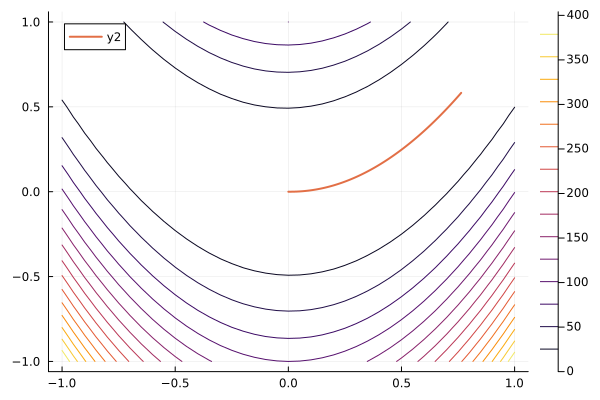

In [13]:
ezcontour(-1:0.05:1, -1:0.05:1, 
MultivariateProblems.UnconstrainedProblems.examples["Rosenbrock"].f)
plot!(map(first,histx),map(x->x[2], histx), linewidth=2)

## Rosenbrock with scaled gradients

In [16]:
fg = opt_problem("Rosenbrock")
histx = Vector{Vector{Float64}}()
x,f,g,hist = gradient_descent_2(fg, [0.0,0.0]; 
    maxiter=100, histx=histx, gamma=1.0)

    iter        val     normg     fdiff
       1   1.00e+00  2.00e+00       Inf
       2   1.00e+02  4.00e+02 -9.90e+01
       3   1.98e+01  8.72e+01  8.02e+01
       4   4.10e+01  1.27e+02 -2.12e+01
       5   8.47e+00  5.29e+01  3.25e+01
       6   9.30e+01  2.21e+02 -8.46e+01
       7   6.67e-01  1.25e+00  9.24e+01
       8   5.92e+00  9.28e+01 -5.26e+00
       9   1.28e+02  2.25e+02 -1.22e+02
      10   1.56e+00  1.94e+01  1.26e+02
      11   1.42e+02  3.17e+02 -1.41e+02
      12   4.03e+00  3.31e+01  1.38e+02
      13   5.94e+01  1.53e+02 -5.54e+01
      14   1.83e+01  9.07e+01  4.11e+01
      15   2.77e+01  1.03e+02 -9.44e+00
      16   4.74e+01  1.45e+02 -1.96e+01
      17   6.66e+00  4.91e+01  4.07e+01
      18   1.00e+02  2.43e+02 -9.34e+01
      19   1.38e+00  3.62e+00  9.86e+01
      20   1.99e+01  9.54e+01 -1.85e+01
      21   2.42e+02  7.88e+02 -2.22e+02
      22   9.51e+00  6.02e+01  2.32e+02
      23   1.51e+02  4.44e+02 -1.41e+02
      24   1.50e+00  1.49e+01  1.49e+02


┌ Warning: Did not converge
└ @ Main ~/Dropbox/courses/cs520-2023/web/input/julia/simple_gradient_descent.jl:189


([0.09587994263036621, -0.016024098298284883], 0.8810230982015401, [-0.8411159432100171, -5.04341233941744], [1.0 100.0 … 97.15854863653045 0.8810230982015401; 2.0 400.0 … 196.1786372673111 5.04341233941744])

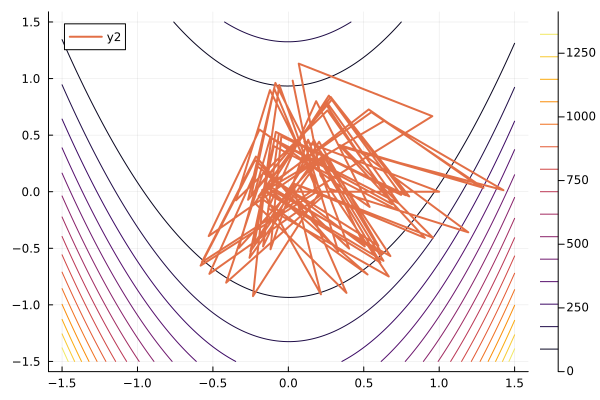

In [17]:
ezcontour(-1.5:0.01:1.5, -1.5:0.01:1.5, 
MultivariateProblems.UnconstrainedProblems.examples["Rosenbrock"].f)
plot!(map(first,histx),map(x->x[2], histx), linewidth=2)

In [18]:
fg = opt_problem("Rosenbrock")
histx = Vector{Vector{Float64}}()
x,f,g,hist = gradient_descent_2(fg, [0.0,0.0]; 
    maxiter=100, histx=histx, gamma=0.1)

    iter        val     normg     fdiff
       1   1.00e+00  2.00e+00       Inf
       2   8.20e-01  2.00e+00  1.80e-01
       3   1.04e+00  1.14e+01 -2.17e-01
       4   8.77e-01  9.71e+00  1.60e-01
       5   1.01e+00  1.15e+01 -1.30e-01
       6   8.56e-01  9.98e+00  1.51e-01
       7   9.83e-01  1.15e+01 -1.27e-01
       8   8.38e-01  1.02e+01  1.45e-01
       9   9.63e-01  1.16e+01 -1.25e-01
      10   8.23e-01  1.04e+01  1.40e-01
      11   9.46e-01  1.17e+01 -1.23e-01
      12   8.10e-01  1.06e+01  1.36e-01
      13   9.32e-01  1.18e+01 -1.22e-01
      14   7.99e-01  1.07e+01  1.33e-01
      15   9.19e-01  1.18e+01 -1.21e-01
      16   7.89e-01  1.09e+01  1.31e-01
      17   9.09e-01  1.19e+01 -1.20e-01
      18   7.80e-01  1.10e+01  1.28e-01
      19   9.00e-01  1.20e+01 -1.19e-01
      20   7.73e-01  1.11e+01  1.27e-01
      21   8.92e-01  1.21e+01 -1.19e-01
      22   7.66e-01  1.13e+01  1.25e-01
      23   8.84e-01  1.22e+01 -1.18e-01
      24   7.60e-01  1.14e+01  1.24e-01


┌ Warning: Did not converge
└ @ Main ~/Dropbox/courses/cs520-2023/web/input/julia/simple_gradient_descent.jl:189


([0.4749617872189258, 0.1603913510137211], 0.700734547473848, [11.33642320348916, -13.039469660895008], [1.0 0.8200000000000001 … 0.8155601633334839 0.700734547473848; 2.0 2.0000000000000004 … 13.638786641436235 13.039469660895008])

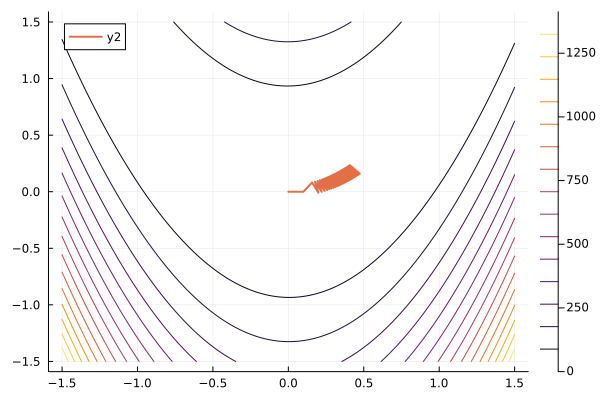

In [19]:
ezcontour(-1.5:0.01:1.5, -1.5:0.01:1.5, 
MultivariateProblems.UnconstrainedProblems.examples["Rosenbrock"].f)
plot!(map(first,histx),map(x->x[2], histx), linewidth=2)

## Rosenbrock using exact gradient descent
In this case, we otpimally solve the line-search problem using ApproxFun

In [22]:
using ApproxFun
function exact_gradient_descent(fg,x0;
    maxiter=10000,tol=1.0e-8,quiet=false,histx=[])
    
    x = copy(x0)
    n = length(x)

    hist = zeros(2,maxiter)
    savehistx = eltype(histx) == Vector{Float64} ? true : false

    f = Inf
    normg = Inf
    lastiter = 0
    g = Vector{Float64}()

    if !quiet
        @printf("  %6s  %9s %9s %9s\n", "iter", 
            "val", "normg", "fdiff");
    end

    for iter=1:maxiter
        if savehistx
            push!(histx, x)
        end
    
        if iter>1
            # Form an ApproxFun and exactly minimize it
            polyf = Fun( alpha -> fg(x - alpha*g)[1], 0.0 .. 10.0)
            amin = argmin(polyf)
            x = x - amin*g;
        end
    
        flast = f
        f,g = fg(x)
        normg = norm(g,Inf)
       
        fdiff = flast - f
    
        if !quiet
            @printf("  %6i  %9.2e %9.2e %9.2e\n", 
                iter, f, normg, fdiff)
        end
    
        hist[:,iter] = [f; normg]
        lastiter = iter
    
        if normg <= tol 
            break 
        end
        if !isfinite(normg)
            break
        end
    end

    if lastiter < maxiter
        hist = hist[:,1:lastiter]
    end

    if normg > tol
        @warn "Did not converge"
    end
    
    return x,f,g,hist
end
fg = opt_problem("Rosenbrock")
histx = Vector{Vector{Float64}}()
x,f,g,hist = exact_gradient_descent(fg, [0.0,0.0]; 
    maxiter=10000, histx=histx)

    iter        val     normg     fdiff
       1   1.00e+00  2.00e+00       Inf
       2   7.71e-01  5.20e+00  2.29e-01
       3   7.03e-01  1.68e+00  6.76e-02
       4   6.57e-01  3.73e+00  4.67e-02
       5   6.22e-01  1.58e+00  3.48e-02
       6   5.94e-01  3.08e+00  2.84e-02
       7   5.70e-01  1.51e+00  2.37e-02
       8   5.49e-01  2.69e+00  2.06e-02
       9   5.31e-01  1.46e+00  1.81e-02
      10   5.15e-01  2.42e+00  1.62e-02
      11   5.00e-01  1.41e+00  1.46e-02
      12   4.87e-01  2.22e+00  1.34e-02
      13   4.75e-01  1.38e+00  1.23e-02
      14   4.63e-01  2.06e+00  1.14e-02
      15   4.53e-01  1.35e+00  1.06e-02
      16   4.43e-01  1.93e+00  9.91e-03
      17   4.34e-01  1.32e+00  9.30e-03
      18   4.25e-01  1.82e+00  8.77e-03
      19   4.17e-01  1.29e+00  8.28e-03
      20   4.09e-01  1.73e+00  7.86e-03
      21   4.01e-01  1.27e+00  7.47e-03
      22   3.94e-01  1.65e+00  7.12e-03
      23   3.87e-01  1.24e+00  6.79e-03
      24   3.81e-01  1.58e+00  6.50e-03


     416   3.71e-02  2.38e-01  1.42e-04
     417   3.69e-02  3.84e-01  1.41e-04
     418   3.68e-02  2.37e-01  1.41e-04
     419   3.66e-02  3.83e-01  1.40e-04
     420   3.65e-02  2.36e-01  1.39e-04
     421   3.64e-02  3.81e-01  1.39e-04
     422   3.62e-02  2.34e-01  1.38e-04
     423   3.61e-02  3.80e-01  1.37e-04
     424   3.59e-02  2.33e-01  1.37e-04
     425   3.58e-02  3.78e-01  1.36e-04
     426   3.57e-02  2.32e-01  1.36e-04
     427   3.55e-02  3.77e-01  1.35e-04
     428   3.54e-02  2.31e-01  1.34e-04
     429   3.53e-02  3.76e-01  1.34e-04
     430   3.51e-02  2.30e-01  1.33e-04
     431   3.50e-02  3.74e-01  1.32e-04
     432   3.49e-02  2.29e-01  1.32e-04
     433   3.47e-02  3.73e-01  1.31e-04
     434   3.46e-02  2.28e-01  1.31e-04
     435   3.45e-02  3.71e-01  1.30e-04
     436   3.44e-02  2.27e-01  1.29e-04
     437   3.42e-02  3.70e-01  1.29e-04
     438   3.41e-02  2.26e-01  1.28e-04
     439   3.40e-02  3.69e-01  1.28e-04
     440   3.38e-02  2.25e-01  1.27e-04


     672   1.52e-02  1.40e-01  4.93e-05
     673   1.51e-02  2.46e-01  4.91e-05
     674   1.51e-02  1.40e-01  4.89e-05
     675   1.50e-02  2.45e-01  4.87e-05
     676   1.50e-02  1.39e-01  4.85e-05
     677   1.49e-02  2.44e-01  4.84e-05
     678   1.49e-02  1.39e-01  4.82e-05
     679   1.48e-02  2.43e-01  4.80e-05
     680   1.48e-02  1.38e-01  4.78e-05
     681   1.47e-02  2.43e-01  4.76e-05
     682   1.47e-02  1.38e-01  4.75e-05
     683   1.46e-02  2.42e-01  4.73e-05
     684   1.46e-02  1.37e-01  4.71e-05
     685   1.45e-02  2.41e-01  4.70e-05
     686   1.45e-02  1.37e-01  4.68e-05
     687   1.44e-02  2.40e-01  4.66e-05
     688   1.44e-02  1.36e-01  4.64e-05
     689   1.43e-02  2.39e-01  4.63e-05
     690   1.43e-02  1.36e-01  4.61e-05
     691   1.42e-02  2.39e-01  4.59e-05
     692   1.42e-02  1.35e-01  4.58e-05
     693   1.42e-02  2.38e-01  4.56e-05
     694   1.41e-02  1.35e-01  4.54e-05
     695   1.41e-02  2.37e-01  4.53e-05
     696   1.40e-02  1.34e-01  4.51e-05


     928   6.87e-03  9.02e-02  2.04e-05
     929   6.84e-03  1.65e-01  2.03e-05
     930   6.82e-03  8.99e-02  2.03e-05
     931   6.80e-03  1.65e-01  2.02e-05
     932   6.78e-03  8.96e-02  2.01e-05
     933   6.76e-03  1.64e-01  2.01e-05
     934   6.74e-03  8.93e-02  2.00e-05
     935   6.72e-03  1.64e-01  1.99e-05
     936   6.70e-03  8.90e-02  1.99e-05
     937   6.68e-03  1.64e-01  1.98e-05
     938   6.66e-03  8.88e-02  1.98e-05
     939   6.65e-03  1.63e-01  1.97e-05
     940   6.63e-03  8.85e-02  1.96e-05
     941   6.61e-03  1.63e-01  1.96e-05
     942   6.59e-03  8.82e-02  1.95e-05
     943   6.57e-03  1.62e-01  1.94e-05
     944   6.55e-03  8.79e-02  1.94e-05
     945   6.53e-03  1.62e-01  1.93e-05
     946   6.51e-03  8.76e-02  1.93e-05
     947   6.49e-03  1.61e-01  1.92e-05
     948   6.47e-03  8.73e-02  1.91e-05
     949   6.45e-03  1.61e-01  1.91e-05
     950   6.43e-03  8.71e-02  1.90e-05
     951   6.41e-03  1.60e-01  1.89e-05
     952   6.39e-03  8.68e-02  1.89e-05


    1184   3.28e-03  6.07e-02  9.24e-06
    1185   3.27e-03  1.14e-01  9.21e-06
    1186   3.26e-03  6.05e-02  9.18e-06
    1187   3.26e-03  1.14e-01  9.15e-06
    1188   3.25e-03  6.03e-02  9.13e-06
    1189   3.24e-03  1.14e-01  9.10e-06
    1190   3.23e-03  6.02e-02  9.07e-06
    1191   3.22e-03  1.13e-01  9.05e-06
    1192   3.21e-03  6.00e-02  9.02e-06
    1193   3.20e-03  1.13e-01  8.99e-06
    1194   3.19e-03  5.98e-02  8.97e-06
    1195   3.18e-03  1.13e-01  8.94e-06
    1196   3.17e-03  5.96e-02  8.91e-06
    1197   3.17e-03  1.13e-01  8.89e-06
    1198   3.16e-03  5.94e-02  8.86e-06
    1199   3.15e-03  1.12e-01  8.83e-06
    1200   3.14e-03  5.93e-02  8.81e-06
    1201   3.13e-03  1.12e-01  8.78e-06
    1202   3.12e-03  5.91e-02  8.75e-06
    1203   3.11e-03  1.12e-01  8.73e-06
    1204   3.10e-03  5.89e-02  8.70e-06
    1205   3.10e-03  1.11e-01  8.68e-06
    1206   3.09e-03  5.87e-02  8.65e-06
    1207   3.08e-03  1.11e-01  8.63e-06
    1208   3.07e-03  5.86e-02  8.60e-06


    1440   1.62e-03  4.19e-02  4.40e-06
    1441   1.62e-03  8.04e-02  4.39e-06
    1442   1.61e-03  4.18e-02  4.38e-06
    1443   1.61e-03  8.02e-02  4.36e-06
    1444   1.60e-03  4.17e-02  4.35e-06
    1445   1.60e-03  8.00e-02  4.34e-06
    1446   1.60e-03  4.15e-02  4.33e-06
    1447   1.59e-03  7.98e-02  4.31e-06
    1448   1.59e-03  4.14e-02  4.30e-06
    1449   1.58e-03  7.96e-02  4.29e-06
    1450   1.58e-03  4.13e-02  4.28e-06
    1451   1.57e-03  7.93e-02  4.27e-06
    1452   1.57e-03  4.12e-02  4.25e-06
    1453   1.57e-03  7.91e-02  4.24e-06
    1454   1.56e-03  4.11e-02  4.23e-06
    1455   1.56e-03  7.89e-02  4.22e-06
    1456   1.55e-03  4.10e-02  4.21e-06
    1457   1.55e-03  7.87e-02  4.19e-06
    1458   1.54e-03  4.08e-02  4.18e-06
    1459   1.54e-03  7.85e-02  4.17e-06
    1460   1.54e-03  4.07e-02  4.16e-06
    1461   1.53e-03  7.83e-02  4.15e-06
    1462   1.53e-03  4.06e-02  4.14e-06
    1463   1.52e-03  7.81e-02  4.12e-06
    1464   1.52e-03  4.05e-02  4.11e-06


    1696   8.17e-04  2.94e-02  2.17e-06
    1697   8.15e-04  5.71e-02  2.16e-06
    1698   8.13e-04  2.93e-02  2.15e-06
    1699   8.11e-04  5.70e-02  2.15e-06
    1700   8.09e-04  2.92e-02  2.14e-06
    1701   8.07e-04  5.68e-02  2.14e-06
    1702   8.04e-04  2.92e-02  2.13e-06
    1703   8.02e-04  5.67e-02  2.12e-06
    1704   8.00e-04  2.91e-02  2.12e-06
    1705   7.98e-04  5.65e-02  2.11e-06
    1706   7.96e-04  2.90e-02  2.11e-06
    1707   7.94e-04  5.64e-02  2.10e-06
    1708   7.92e-04  2.89e-02  2.10e-06
    1709   7.90e-04  5.62e-02  2.09e-06
    1710   7.88e-04  2.88e-02  2.08e-06
    1711   7.86e-04  5.61e-02  2.08e-06
    1712   7.83e-04  2.88e-02  2.07e-06
    1713   7.81e-04  5.59e-02  2.07e-06
    1714   7.79e-04  2.87e-02  2.06e-06
    1715   7.77e-04  5.58e-02  2.06e-06
    1716   7.75e-04  2.86e-02  2.05e-06
    1717   7.73e-04  5.56e-02  2.05e-06
    1718   7.71e-04  2.85e-02  2.04e-06
    1719   7.69e-04  5.55e-02  2.03e-06
    1720   7.67e-04  2.84e-02  2.03e-06


    1952   4.18e-04  2.08e-02  1.09e-06
    1953   4.17e-04  4.08e-02  1.09e-06
    1954   4.15e-04  2.08e-02  1.08e-06
    1955   4.14e-04  4.07e-02  1.08e-06
    1956   4.13e-04  2.07e-02  1.08e-06
    1957   4.12e-04  4.06e-02  1.07e-06
    1958   4.11e-04  2.07e-02  1.07e-06
    1959   4.10e-04  4.05e-02  1.07e-06
    1960   4.09e-04  2.06e-02  1.07e-06
    1961   4.08e-04  4.04e-02  1.06e-06
    1962   4.07e-04  2.06e-02  1.06e-06
    1963   4.06e-04  4.03e-02  1.06e-06
    1964   4.05e-04  2.05e-02  1.05e-06
    1965   4.04e-04  4.02e-02  1.05e-06
    1966   4.03e-04  2.05e-02  1.05e-06
    1967   4.02e-04  4.01e-02  1.05e-06
    1968   4.01e-04  2.04e-02  1.04e-06
    1969   4.00e-04  4.00e-02  1.04e-06
    1970   3.99e-04  2.03e-02  1.04e-06
    1971   3.98e-04  3.99e-02  1.03e-06
    1972   3.96e-04  2.03e-02  1.03e-06
    1973   3.95e-04  3.98e-02  1.03e-06
    1974   3.94e-04  2.02e-02  1.03e-06
    1975   3.93e-04  3.97e-02  1.02e-06
    1976   3.92e-04  2.02e-02  1.02e-06


    2232   2.03e-04  1.44e-02  5.21e-07
    2233   2.02e-04  2.84e-02  5.20e-07
    2234   2.02e-04  1.44e-02  5.18e-07
    2235   2.01e-04  2.84e-02  5.17e-07
    2236   2.00e-04  1.43e-02  5.16e-07
    2237   2.00e-04  2.83e-02  5.14e-07
    2238   1.99e-04  1.43e-02  5.13e-07
    2239   1.99e-04  2.82e-02  5.12e-07
    2240   1.98e-04  1.43e-02  5.10e-07
    2241   1.98e-04  2.81e-02  5.09e-07
    2242   1.97e-04  1.42e-02  5.08e-07
    2243   1.97e-04  2.81e-02  5.06e-07
    2244   1.96e-04  1.42e-02  5.05e-07
    2245   1.96e-04  2.80e-02  5.04e-07
    2246   1.95e-04  1.42e-02  5.02e-07
    2247   1.95e-04  2.79e-02  5.01e-07
    2248   1.94e-04  1.41e-02  5.00e-07
    2249   1.94e-04  2.78e-02  4.99e-07
    2250   1.93e-04  1.41e-02  4.97e-07
    2251   1.93e-04  2.78e-02  4.96e-07
    2252   1.92e-04  1.40e-02  4.95e-07
    2253   1.92e-04  2.77e-02  4.93e-07
    2254   1.91e-04  1.40e-02  4.92e-07
    2255   1.91e-04  2.76e-02  4.91e-07
    2256   1.90e-04  1.40e-02  4.90e-07


    2488   1.05e-04  1.04e-02  2.69e-07
    2489   1.05e-04  2.05e-02  2.68e-07
    2490   1.05e-04  1.03e-02  2.67e-07
    2491   1.04e-04  2.04e-02  2.66e-07
    2492   1.04e-04  1.03e-02  2.66e-07
    2493   1.04e-04  2.04e-02  2.65e-07
    2494   1.04e-04  1.03e-02  2.64e-07
    2495   1.03e-04  2.03e-02  2.64e-07
    2496   1.03e-04  1.02e-02  2.63e-07
    2497   1.03e-04  2.03e-02  2.62e-07
    2498   1.03e-04  1.02e-02  2.62e-07
    2499   1.02e-04  2.02e-02  2.61e-07
    2500   1.02e-04  1.02e-02  2.60e-07
    2501   1.02e-04  2.02e-02  2.60e-07
    2502   1.02e-04  1.02e-02  2.59e-07
    2503   1.01e-04  2.01e-02  2.58e-07
    2504   1.01e-04  1.01e-02  2.58e-07
    2505   1.01e-04  2.01e-02  2.57e-07
    2506   1.00e-04  1.01e-02  2.56e-07
    2507   1.00e-04  2.00e-02  2.56e-07
    2508   1.00e-04  1.01e-02  2.55e-07
    2509   9.97e-05  2.00e-02  2.54e-07
    2510   9.95e-05  1.01e-02  2.54e-07
    2511   9.92e-05  1.99e-02  2.53e-07
    2512   9.90e-05  1.00e-02  2.52e-07


    2744   5.49e-05  7.46e-03  1.39e-07
    2745   5.48e-05  1.48e-02  1.39e-07
    2746   5.46e-05  7.44e-03  1.39e-07
    2747   5.45e-05  1.48e-02  1.38e-07
    2748   5.43e-05  7.42e-03  1.38e-07
    2749   5.42e-05  1.47e-02  1.38e-07
    2750   5.41e-05  7.40e-03  1.37e-07
    2751   5.39e-05  1.47e-02  1.37e-07
    2752   5.38e-05  7.38e-03  1.36e-07
    2753   5.37e-05  1.47e-02  1.36e-07
    2754   5.35e-05  7.36e-03  1.36e-07
    2755   5.34e-05  1.46e-02  1.35e-07
    2756   5.33e-05  7.34e-03  1.35e-07
    2757   5.31e-05  1.46e-02  1.35e-07
    2758   5.30e-05  7.32e-03  1.34e-07
    2759   5.29e-05  1.45e-02  1.34e-07
    2760   5.27e-05  7.30e-03  1.34e-07
    2761   5.26e-05  1.45e-02  1.33e-07
    2762   5.25e-05  7.29e-03  1.33e-07
    2763   5.23e-05  1.45e-02  1.33e-07
    2764   5.22e-05  7.27e-03  1.32e-07
    2765   5.21e-05  1.44e-02  1.32e-07
    2766   5.19e-05  7.25e-03  1.32e-07
    2767   5.18e-05  1.44e-02  1.31e-07
    2768   5.17e-05  7.23e-03  1.31e-07


    3000   2.87e-05  5.38e-03  7.26e-08
    3001   2.87e-05  1.07e-02  7.24e-08
    3002   2.86e-05  5.37e-03  7.22e-08
    3003   2.85e-05  1.07e-02  7.21e-08
    3004   2.84e-05  5.36e-03  7.19e-08
    3005   2.84e-05  1.07e-02  7.17e-08
    3006   2.83e-05  5.34e-03  7.15e-08
    3007   2.82e-05  1.06e-02  7.13e-08
    3008   2.82e-05  5.33e-03  7.12e-08
    3009   2.81e-05  1.06e-02  7.10e-08
    3010   2.80e-05  5.31e-03  7.08e-08
    3011   2.79e-05  1.06e-02  7.06e-08
    3012   2.79e-05  5.30e-03  7.04e-08
    3013   2.78e-05  1.05e-02  7.03e-08
    3014   2.77e-05  5.29e-03  7.01e-08
    3015   2.77e-05  1.05e-02  6.99e-08
    3016   2.76e-05  5.27e-03  6.97e-08
    3017   2.75e-05  1.05e-02  6.95e-08
    3018   2.75e-05  5.26e-03  6.94e-08
    3019   2.74e-05  1.05e-02  6.92e-08
    3020   2.73e-05  5.25e-03  6.90e-08
    3021   2.73e-05  1.04e-02  6.88e-08
    3022   2.72e-05  5.23e-03  6.87e-08
    3023   2.71e-05  1.04e-02  6.85e-08
    3024   2.70e-05  5.22e-03  6.83e-08


    3256   1.51e-05  3.89e-03  3.80e-08
    3257   1.50e-05  7.76e-03  3.79e-08
    3258   1.50e-05  3.88e-03  3.78e-08
    3259   1.50e-05  7.74e-03  3.77e-08
    3260   1.49e-05  3.87e-03  3.76e-08
    3261   1.49e-05  7.72e-03  3.75e-08
    3262   1.48e-05  3.86e-03  3.74e-08
    3263   1.48e-05  7.70e-03  3.73e-08
    3264   1.48e-05  3.85e-03  3.72e-08
    3265   1.47e-05  7.68e-03  3.71e-08
    3266   1.47e-05  3.84e-03  3.70e-08
    3267   1.47e-05  7.66e-03  3.69e-08
    3268   1.46e-05  3.83e-03  3.68e-08
    3269   1.46e-05  7.64e-03  3.68e-08
    3270   1.46e-05  3.82e-03  3.67e-08
    3271   1.45e-05  7.62e-03  3.66e-08
    3272   1.45e-05  3.81e-03  3.65e-08
    3273   1.44e-05  7.60e-03  3.64e-08
    3274   1.44e-05  3.81e-03  3.63e-08
    3275   1.44e-05  7.58e-03  3.62e-08
    3276   1.43e-05  3.80e-03  3.61e-08
    3277   1.43e-05  7.56e-03  3.60e-08
    3278   1.43e-05  3.79e-03  3.59e-08
    3279   1.42e-05  7.54e-03  3.58e-08
    3280   1.42e-05  3.78e-03  3.57e-08


    3512   7.92e-06  2.82e-03  1.99e-08
    3513   7.90e-06  5.62e-03  1.99e-08
    3514   7.88e-06  2.81e-03  1.98e-08
    3515   7.86e-06  5.61e-03  1.98e-08
    3516   7.84e-06  2.80e-03  1.97e-08
    3517   7.82e-06  5.59e-03  1.97e-08
    3518   7.80e-06  2.80e-03  1.96e-08
    3519   7.78e-06  5.58e-03  1.96e-08
    3520   7.76e-06  2.79e-03  1.95e-08
    3521   7.74e-06  5.57e-03  1.95e-08
    3522   7.73e-06  2.78e-03  1.94e-08
    3523   7.71e-06  5.55e-03  1.94e-08
    3524   7.69e-06  2.78e-03  1.93e-08
    3525   7.67e-06  5.54e-03  1.93e-08
    3526   7.65e-06  2.77e-03  1.92e-08
    3527   7.63e-06  5.52e-03  1.92e-08
    3528   7.61e-06  2.76e-03  1.91e-08
    3529   7.59e-06  5.51e-03  1.91e-08
    3530   7.57e-06  2.76e-03  1.90e-08
    3531   7.55e-06  5.50e-03  1.90e-08
    3532   7.53e-06  2.75e-03  1.89e-08
    3533   7.51e-06  5.48e-03  1.89e-08
    3534   7.50e-06  2.74e-03  1.88e-08
    3535   7.48e-06  5.47e-03  1.88e-08
    3536   7.46e-06  2.74e-03  1.87e-08


    3750   4.36e-06  2.09e-03  1.09e-08
    3751   4.35e-06  4.17e-03  1.09e-08
    3752   4.34e-06  2.08e-03  1.09e-08
    3753   4.33e-06  4.16e-03  1.09e-08
    3754   4.32e-06  2.08e-03  1.08e-08
    3755   4.31e-06  4.15e-03  1.08e-08
    3756   4.29e-06  2.07e-03  1.08e-08
    3757   4.28e-06  4.14e-03  1.08e-08
    3758   4.27e-06  2.07e-03  1.07e-08
    3759   4.26e-06  4.13e-03  1.07e-08
    3760   4.25e-06  2.06e-03  1.07e-08
    3761   4.24e-06  4.12e-03  1.06e-08
    3762   4.23e-06  2.06e-03  1.06e-08
    3763   4.22e-06  4.11e-03  1.06e-08
    3764   4.21e-06  2.05e-03  1.06e-08
    3765   4.20e-06  4.10e-03  1.05e-08
    3766   4.19e-06  2.05e-03  1.05e-08
    3767   4.18e-06  4.09e-03  1.05e-08
    3768   4.17e-06  2.04e-03  1.05e-08
    3769   4.16e-06  4.08e-03  1.04e-08
    3770   4.15e-06  2.04e-03  1.04e-08
    3771   4.14e-06  4.07e-03  1.04e-08
    3772   4.13e-06  2.03e-03  1.04e-08
    3773   4.12e-06  4.06e-03  1.03e-08
    3774   4.11e-06  2.03e-03  1.03e-08


    4006   2.30e-06  1.52e-03  5.76e-09
    4007   2.29e-06  3.03e-03  5.74e-09
    4008   2.28e-06  1.51e-03  5.73e-09
    4009   2.28e-06  3.02e-03  5.71e-09
    4010   2.27e-06  1.51e-03  5.70e-09
    4011   2.27e-06  3.01e-03  5.68e-09
    4012   2.26e-06  1.50e-03  5.67e-09
    4013   2.26e-06  3.00e-03  5.66e-09
    4014   2.25e-06  1.50e-03  5.64e-09
    4015   2.24e-06  3.00e-03  5.63e-09
    4016   2.24e-06  1.50e-03  5.61e-09
    4017   2.23e-06  2.99e-03  5.60e-09
    4018   2.23e-06  1.49e-03  5.59e-09
    4019   2.22e-06  2.98e-03  5.57e-09
    4020   2.22e-06  1.49e-03  5.56e-09
    4021   2.21e-06  2.97e-03  5.54e-09
    4022   2.21e-06  1.49e-03  5.53e-09
    4023   2.20e-06  2.97e-03  5.52e-09
    4024   2.19e-06  1.48e-03  5.50e-09
    4025   2.19e-06  2.96e-03  5.49e-09
    4026   2.18e-06  1.48e-03  5.47e-09
    4027   2.18e-06  2.95e-03  5.46e-09
    4028   2.17e-06  1.47e-03  5.45e-09
    4029   2.17e-06  2.94e-03  5.43e-09
    4030   2.16e-06  1.47e-03  5.42e-09


    4262   1.21e-06  1.10e-03  3.03e-09
    4263   1.21e-06  2.20e-03  3.02e-09
    4264   1.20e-06  1.10e-03  3.01e-09
    4265   1.20e-06  2.19e-03  3.01e-09
    4266   1.20e-06  1.09e-03  3.00e-09
    4267   1.19e-06  2.19e-03  2.99e-09
    4268   1.19e-06  1.09e-03  2.98e-09
    4269   1.19e-06  2.18e-03  2.98e-09
    4270   1.19e-06  1.09e-03  2.97e-09
    4271   1.18e-06  2.17e-03  2.96e-09
    4272   1.18e-06  1.09e-03  2.96e-09
    4273   1.18e-06  2.17e-03  2.95e-09
    4274   1.17e-06  1.08e-03  2.94e-09
    4275   1.17e-06  2.16e-03  2.93e-09
    4276   1.17e-06  1.08e-03  2.93e-09
    4277   1.16e-06  2.16e-03  2.92e-09
    4278   1.16e-06  1.08e-03  2.91e-09
    4279   1.16e-06  2.15e-03  2.90e-09
    4280   1.16e-06  1.08e-03  2.90e-09
    4281   1.15e-06  2.15e-03  2.89e-09
    4282   1.15e-06  1.07e-03  2.88e-09
    4283   1.15e-06  2.14e-03  2.87e-09
    4284   1.14e-06  1.07e-03  2.87e-09
    4285   1.14e-06  2.14e-03  2.86e-09
    4286   1.14e-06  1.07e-03  2.85e-09


    4518   6.37e-07  7.98e-04  1.60e-09
    4519   6.36e-07  1.59e-03  1.59e-09
    4520   6.34e-07  7.96e-04  1.59e-09
    4521   6.33e-07  1.59e-03  1.58e-09
    4522   6.31e-07  7.94e-04  1.58e-09
    4523   6.30e-07  1.59e-03  1.58e-09
    4524   6.28e-07  7.92e-04  1.57e-09
    4525   6.26e-07  1.58e-03  1.57e-09
    4526   6.25e-07  7.90e-04  1.56e-09
    4527   6.23e-07  1.58e-03  1.56e-09
    4528   6.22e-07  7.88e-04  1.56e-09
    4529   6.20e-07  1.57e-03  1.55e-09
    4530   6.19e-07  7.86e-04  1.55e-09
    4531   6.17e-07  1.57e-03  1.55e-09
    4532   6.15e-07  7.84e-04  1.54e-09
    4533   6.14e-07  1.57e-03  1.54e-09
    4534   6.12e-07  7.82e-04  1.53e-09
    4535   6.11e-07  1.56e-03  1.53e-09
    4536   6.09e-07  7.80e-04  1.53e-09
    4537   6.08e-07  1.56e-03  1.52e-09
    4538   6.06e-07  7.78e-04  1.52e-09
    4539   6.05e-07  1.56e-03  1.51e-09
    4540   6.03e-07  7.76e-04  1.51e-09
    4541   6.02e-07  1.55e-03  1.51e-09
    4542   6.00e-07  7.74e-04  1.50e-09


    4774   3.36e-07  5.79e-04  8.41e-10
    4775   3.35e-07  1.16e-03  8.39e-10
    4776   3.34e-07  5.78e-04  8.37e-10
    4777   3.34e-07  1.16e-03  8.35e-10
    4778   3.33e-07  5.76e-04  8.33e-10
    4779   3.32e-07  1.15e-03  8.31e-10
    4780   3.31e-07  5.75e-04  8.29e-10
    4781   3.30e-07  1.15e-03  8.27e-10
    4782   3.29e-07  5.74e-04  8.25e-10
    4783   3.29e-07  1.15e-03  8.22e-10
    4784   3.28e-07  5.72e-04  8.20e-10
    4785   3.27e-07  1.14e-03  8.18e-10
    4786   3.26e-07  5.71e-04  8.16e-10
    4787   3.25e-07  1.14e-03  8.14e-10
    4788   3.25e-07  5.69e-04  8.12e-10
    4789   3.24e-07  1.14e-03  8.10e-10
    4790   3.23e-07  5.68e-04  8.08e-10
    4791   3.22e-07  1.14e-03  8.06e-10
    4792   3.21e-07  5.66e-04  8.04e-10
    4793   3.20e-07  1.13e-03  8.02e-10
    4794   3.20e-07  5.65e-04  8.00e-10
    4795   3.19e-07  1.13e-03  7.98e-10
    4796   3.18e-07  5.64e-04  7.96e-10
    4797   3.17e-07  1.13e-03  7.94e-10
    4798   3.17e-07  5.62e-04  7.92e-10


    5192   1.18e-07  3.44e-04  2.96e-10
    5193   1.18e-07  6.87e-04  2.95e-10
    5194   1.18e-07  3.43e-04  2.94e-10
    5195   1.17e-07  6.85e-04  2.94e-10
    5196   1.17e-07  3.42e-04  2.93e-10
    5197   1.17e-07  6.83e-04  2.92e-10
    5198   1.16e-07  3.41e-04  2.91e-10
    5199   1.16e-07  6.82e-04  2.91e-10
    5200   1.16e-07  3.40e-04  2.90e-10
    5201   1.16e-07  6.80e-04  2.89e-10
    5202   1.15e-07  3.39e-04  2.89e-10
    5203   1.15e-07  6.78e-04  2.88e-10
    5204   1.15e-07  3.38e-04  2.87e-10
    5205   1.14e-07  6.77e-04  2.86e-10
    5206   1.14e-07  3.38e-04  2.86e-10
    5207   1.14e-07  6.75e-04  2.85e-10
    5208   1.14e-07  3.37e-04  2.84e-10
    5209   1.13e-07  6.73e-04  2.83e-10
    5210   1.13e-07  3.36e-04  2.83e-10
    5211   1.13e-07  6.72e-04  2.82e-10
    5212   1.12e-07  3.35e-04  2.81e-10
    5213   1.12e-07  6.70e-04  2.81e-10
    5214   1.12e-07  3.34e-04  2.80e-10
    5215   1.12e-07  6.68e-04  2.79e-10
    5216   1.11e-07  3.33e-04  2.79e-10


    5448   6.24e-08  2.49e-04  1.56e-10
    5449   6.22e-08  4.99e-04  1.56e-10
    5450   6.21e-08  2.49e-04  1.55e-10
    5451   6.19e-08  4.98e-04  1.55e-10
    5452   6.18e-08  2.48e-04  1.54e-10
    5453   6.16e-08  4.96e-04  1.54e-10
    5454   6.14e-08  2.48e-04  1.54e-10
    5455   6.13e-08  4.95e-04  1.53e-10
    5456   6.11e-08  2.47e-04  1.53e-10
    5457   6.10e-08  4.94e-04  1.53e-10
    5458   6.08e-08  2.46e-04  1.52e-10
    5459   6.07e-08  4.93e-04  1.52e-10
    5460   6.05e-08  2.46e-04  1.51e-10
    5461   6.04e-08  4.91e-04  1.51e-10
    5462   6.02e-08  2.45e-04  1.51e-10
    5463   6.01e-08  4.90e-04  1.50e-10
    5464   5.99e-08  2.45e-04  1.50e-10
    5465   5.98e-08  4.89e-04  1.50e-10
    5466   5.96e-08  2.44e-04  1.49e-10
    5467   5.95e-08  4.88e-04  1.49e-10
    5468   5.93e-08  2.43e-04  1.48e-10
    5469   5.92e-08  4.87e-04  1.48e-10
    5470   5.90e-08  2.43e-04  1.48e-10
    5471   5.89e-08  4.85e-04  1.47e-10
    5472   5.87e-08  2.42e-04  1.47e-10


    5704   3.29e-08  1.81e-04  8.23e-11
    5705   3.28e-08  3.62e-04  8.21e-11
    5706   3.27e-08  1.81e-04  8.19e-11
    5707   3.27e-08  3.61e-04  8.17e-11
    5708   3.26e-08  1.80e-04  8.15e-11
    5709   3.25e-08  3.61e-04  8.13e-11
    5710   3.24e-08  1.80e-04  8.11e-11
    5711   3.23e-08  3.60e-04  8.09e-11
    5712   3.23e-08  1.79e-04  8.07e-11
    5713   3.22e-08  3.59e-04  8.05e-11
    5714   3.21e-08  1.79e-04  8.03e-11
    5715   3.20e-08  3.58e-04  8.01e-11
    5716   3.19e-08  1.79e-04  7.99e-11
    5717   3.19e-08  3.57e-04  7.97e-11
    5718   3.18e-08  1.78e-04  7.95e-11
    5719   3.17e-08  3.56e-04  7.93e-11
    5720   3.16e-08  1.78e-04  7.91e-11
    5721   3.15e-08  3.55e-04  7.89e-11
    5722   3.15e-08  1.77e-04  7.87e-11
    5723   3.14e-08  3.54e-04  7.85e-11
    5724   3.13e-08  1.77e-04  7.83e-11
    5725   3.12e-08  3.53e-04  7.81e-11
    5726   3.11e-08  1.76e-04  7.79e-11
    5727   3.11e-08  3.53e-04  7.77e-11
    5728   3.10e-08  1.76e-04  7.75e-11


    5960   1.74e-08  1.32e-04  4.34e-11
    5961   1.73e-08  2.63e-04  4.33e-11
    5962   1.73e-08  1.31e-04  4.32e-11
    5963   1.72e-08  2.63e-04  4.31e-11
    5964   1.72e-08  1.31e-04  4.30e-11
    5965   1.71e-08  2.62e-04  4.29e-11
    5966   1.71e-08  1.31e-04  4.28e-11
    5967   1.71e-08  2.61e-04  4.27e-11
    5968   1.70e-08  1.30e-04  4.26e-11
    5969   1.70e-08  2.61e-04  4.25e-11
    5970   1.69e-08  1.30e-04  4.23e-11
    5971   1.69e-08  2.60e-04  4.22e-11
    5972   1.68e-08  1.30e-04  4.21e-11
    5973   1.68e-08  2.59e-04  4.20e-11
    5974   1.68e-08  1.29e-04  4.19e-11
    5975   1.67e-08  2.59e-04  4.18e-11
    5976   1.67e-08  1.29e-04  4.17e-11
    5977   1.66e-08  2.58e-04  4.16e-11
    5978   1.66e-08  1.29e-04  4.15e-11
    5979   1.66e-08  2.57e-04  4.14e-11
    5980   1.65e-08  1.28e-04  4.13e-11
    5981   1.65e-08  2.57e-04  4.12e-11
    5982   1.64e-08  1.28e-04  4.11e-11
    5983   1.64e-08  2.56e-04  4.10e-11
    5984   1.64e-08  1.28e-04  4.09e-11


    6346   6.62e-09  8.13e-05  1.66e-11
    6347   6.60e-09  1.63e-04  1.65e-11
    6348   6.59e-09  8.11e-05  1.65e-11
    6349   6.57e-09  1.62e-04  1.64e-11
    6350   6.56e-09  8.09e-05  1.64e-11
    6351   6.54e-09  1.62e-04  1.64e-11
    6352   6.52e-09  8.07e-05  1.63e-11
    6353   6.51e-09  1.61e-04  1.63e-11
    6354   6.49e-09  8.05e-05  1.62e-11
    6355   6.47e-09  1.61e-04  1.62e-11
    6356   6.46e-09  8.03e-05  1.61e-11
    6357   6.44e-09  1.61e-04  1.61e-11
    6358   6.43e-09  8.01e-05  1.61e-11
    6359   6.41e-09  1.60e-04  1.60e-11
    6360   6.39e-09  7.99e-05  1.60e-11
    6361   6.38e-09  1.60e-04  1.59e-11
    6362   6.36e-09  7.97e-05  1.59e-11
    6363   6.35e-09  1.59e-04  1.59e-11
    6364   6.33e-09  7.95e-05  1.58e-11
    6365   6.31e-09  1.59e-04  1.58e-11
    6366   6.30e-09  7.93e-05  1.57e-11
    6367   6.28e-09  1.59e-04  1.57e-11
    6368   6.27e-09  7.91e-05  1.57e-11
    6369   6.25e-09  1.58e-04  1.56e-11
    6370   6.24e-09  7.89e-05  1.56e-11


    6602   3.49e-09  5.90e-05  8.74e-12
    6603   3.49e-09  1.18e-04  8.71e-12
    6604   3.48e-09  5.89e-05  8.69e-12
    6605   3.47e-09  1.18e-04  8.67e-12
    6606   3.46e-09  5.87e-05  8.65e-12
    6607   3.45e-09  1.17e-04  8.63e-12
    6608   3.44e-09  5.86e-05  8.61e-12
    6609   3.43e-09  1.17e-04  8.58e-12
    6610   3.42e-09  5.85e-05  8.56e-12
    6611   3.42e-09  1.17e-04  8.54e-12
    6612   3.41e-09  5.83e-05  8.52e-12
    6613   3.40e-09  1.17e-04  8.50e-12
    6614   3.39e-09  5.82e-05  8.48e-12
    6615   3.38e-09  1.16e-04  8.46e-12
    6616   3.37e-09  5.80e-05  8.44e-12
    6617   3.37e-09  1.16e-04  8.41e-12
    6618   3.36e-09  5.79e-05  8.39e-12
    6619   3.35e-09  1.16e-04  8.37e-12
    6620   3.34e-09  5.77e-05  8.35e-12
    6621   3.33e-09  1.15e-04  8.33e-12
    6622   3.32e-09  5.76e-05  8.31e-12
    6623   3.32e-09  1.15e-04  8.29e-12
    6624   3.31e-09  5.74e-05  8.27e-12
    6625   3.30e-09  1.15e-04  8.25e-12
    6626   3.29e-09  5.73e-05  8.23e-12


    7016   1.24e-09  3.52e-05  3.11e-12
    7017   1.24e-09  7.04e-05  3.10e-12
    7018   1.24e-09  3.51e-05  3.09e-12
    7019   1.23e-09  7.02e-05  3.08e-12
    7020   1.23e-09  3.50e-05  3.08e-12
    7021   1.23e-09  7.01e-05  3.07e-12
    7022   1.22e-09  3.49e-05  3.06e-12
    7023   1.22e-09  6.99e-05  3.05e-12
    7024   1.22e-09  3.49e-05  3.05e-12
    7025   1.21e-09  6.97e-05  3.04e-12
    7026   1.21e-09  3.48e-05  3.03e-12
    7027   1.21e-09  6.95e-05  3.02e-12
    7028   1.21e-09  3.47e-05  3.01e-12
    7029   1.20e-09  6.94e-05  3.01e-12
    7030   1.20e-09  3.46e-05  3.00e-12
    7031   1.20e-09  6.92e-05  2.99e-12
    7032   1.19e-09  3.45e-05  2.98e-12
    7033   1.19e-09  6.90e-05  2.98e-12
    7034   1.19e-09  3.44e-05  2.97e-12
    7035   1.18e-09  6.88e-05  2.96e-12
    7036   1.18e-09  3.43e-05  2.96e-12
    7037   1.18e-09  6.87e-05  2.95e-12
    7038   1.18e-09  3.43e-05  2.94e-12
    7039   1.17e-09  6.85e-05  2.93e-12
    7040   1.17e-09  3.42e-05  2.93e-12


    7280   6.43e-10  2.53e-05  1.61e-12
    7281   6.41e-10  5.06e-05  1.60e-12
    7282   6.40e-10  2.53e-05  1.60e-12
    7283   6.38e-10  5.05e-05  1.59e-12
    7284   6.36e-10  2.52e-05  1.59e-12
    7285   6.35e-10  5.04e-05  1.59e-12
    7286   6.33e-10  2.51e-05  1.58e-12
    7287   6.32e-10  5.03e-05  1.58e-12
    7288   6.30e-10  2.51e-05  1.58e-12
    7289   6.28e-10  5.01e-05  1.57e-12
    7290   6.27e-10  2.50e-05  1.57e-12
    7291   6.25e-10  5.00e-05  1.56e-12
    7292   6.24e-10  2.49e-05  1.56e-12
    7293   6.22e-10  4.99e-05  1.56e-12
    7294   6.21e-10  2.49e-05  1.55e-12
    7295   6.19e-10  4.98e-05  1.55e-12
    7296   6.18e-10  2.48e-05  1.54e-12
    7297   6.16e-10  4.96e-05  1.54e-12
    7298   6.14e-10  2.48e-05  1.54e-12
    7299   6.13e-10  4.95e-05  1.53e-12
    7300   6.11e-10  2.47e-05  1.53e-12
    7301   6.10e-10  4.94e-05  1.52e-12
    7302   6.08e-10  2.46e-05  1.52e-12
    7303   6.07e-10  4.93e-05  1.52e-12
    7304   6.05e-10  2.46e-05  1.51e-12


    7550   3.28e-10  1.81e-05  8.19e-13
    7551   3.27e-10  3.61e-05  8.17e-13
    7552   3.26e-10  1.80e-05  8.15e-13
    7553   3.25e-10  3.61e-05  8.13e-13
    7554   3.24e-10  1.80e-05  8.11e-13
    7555   3.23e-10  3.60e-05  8.09e-13
    7556   3.23e-10  1.79e-05  8.07e-13
    7557   3.22e-10  3.59e-05  8.05e-13
    7558   3.21e-10  1.79e-05  8.03e-13
    7559   3.20e-10  3.58e-05  8.01e-13
    7560   3.19e-10  1.79e-05  7.99e-13
    7561   3.19e-10  3.57e-05  7.97e-13
    7562   3.18e-10  1.78e-05  7.95e-13
    7563   3.17e-10  3.56e-05  7.93e-13
    7564   3.16e-10  1.78e-05  7.91e-13
    7565   3.15e-10  3.55e-05  7.89e-13
    7566   3.15e-10  1.77e-05  7.87e-13
    7567   3.14e-10  3.54e-05  7.85e-13
    7568   3.13e-10  1.77e-05  7.83e-13
    7569   3.12e-10  3.53e-05  7.81e-13
    7570   3.12e-10  1.76e-05  7.79e-13
    7571   3.11e-10  3.53e-05  7.77e-13
    7572   3.10e-10  1.76e-05  7.75e-13
    7573   3.09e-10  3.52e-05  7.73e-13
    7574   3.08e-10  1.75e-05  7.71e-13


    7772   1.88e-10  1.37e-05  4.70e-13
    7773   1.88e-10  2.74e-05  4.69e-13
    7774   1.87e-10  1.37e-05  4.68e-13
    7775   1.87e-10  2.73e-05  4.67e-13
    7776   1.86e-10  1.36e-05  4.66e-13
    7777   1.86e-10  2.73e-05  4.65e-13
    7778   1.85e-10  1.36e-05  4.63e-13
    7779   1.85e-10  2.72e-05  4.62e-13
    7780   1.84e-10  1.36e-05  4.61e-13
    7781   1.84e-10  2.71e-05  4.60e-13
    7782   1.84e-10  1.35e-05  4.59e-13
    7783   1.83e-10  2.71e-05  4.58e-13
    7784   1.83e-10  1.35e-05  4.56e-13
    7785   1.82e-10  2.70e-05  4.55e-13
    7786   1.82e-10  1.35e-05  4.54e-13
    7787   1.81e-10  2.69e-05  4.53e-13
    7788   1.81e-10  1.34e-05  4.52e-13
    7789   1.80e-10  2.69e-05  4.51e-13
    7790   1.80e-10  1.34e-05  4.50e-13
    7791   1.79e-10  2.68e-05  4.49e-13
    7792   1.79e-10  1.34e-05  4.47e-13
    7793   1.79e-10  2.67e-05  4.46e-13
    7794   1.78e-10  1.33e-05  4.45e-13
    7795   1.78e-10  2.67e-05  4.44e-13
    7796   1.77e-10  1.33e-05  4.43e-13


    8002   1.06e-10  1.03e-05  2.65e-13
    8003   1.06e-10  2.06e-05  2.64e-13
    8004   1.05e-10  1.03e-05  2.64e-13
    8005   1.05e-10  2.05e-05  2.63e-13
    8006   1.05e-10  1.02e-05  2.62e-13
    8007   1.05e-10  2.05e-05  2.62e-13
    8008   1.04e-10  1.02e-05  2.61e-13
    8009   1.04e-10  2.04e-05  2.60e-13
    8010   1.04e-10  1.02e-05  2.60e-13
    8011   1.04e-10  2.04e-05  2.59e-13
    8012   1.03e-10  1.02e-05  2.58e-13
    8013   1.03e-10  2.03e-05  2.58e-13
    8014   1.03e-10  1.01e-05  2.57e-13
    8015   1.03e-10  2.03e-05  2.56e-13
    8016   1.02e-10  1.01e-05  2.56e-13
    8017   1.02e-10  2.02e-05  2.55e-13
    8018   1.02e-10  1.01e-05  2.54e-13
    8019   1.02e-10  2.02e-05  2.54e-13
    8020   1.01e-10  1.01e-05  2.53e-13
    8021   1.01e-10  2.01e-05  2.53e-13
    8022   1.01e-10  1.00e-05  2.52e-13
    8023   1.01e-10  2.01e-05  2.51e-13
    8024   1.00e-10  1.00e-05  2.51e-13
    8025   1.00e-10  2.00e-05  2.50e-13
    8026   9.98e-11  9.98e-06  2.49e-13


    8228   6.03e-11  7.75e-06  1.51e-13
    8229   6.01e-11  1.55e-05  1.50e-13
    8230   6.00e-11  7.73e-06  1.50e-13
    8231   5.98e-11  1.55e-05  1.50e-13
    8232   5.97e-11  7.71e-06  1.49e-13
    8233   5.95e-11  1.54e-05  1.49e-13
    8234   5.94e-11  7.69e-06  1.48e-13
    8235   5.92e-11  1.54e-05  1.48e-13
    8236   5.91e-11  7.68e-06  1.48e-13
    8237   5.89e-11  1.54e-05  1.47e-13
    8238   5.88e-11  7.66e-06  1.47e-13
    8239   5.86e-11  1.53e-05  1.47e-13
    8240   5.85e-11  7.64e-06  1.46e-13
    8241   5.83e-11  1.53e-05  1.46e-13
    8242   5.82e-11  7.62e-06  1.45e-13
    8243   5.80e-11  1.52e-05  1.45e-13
    8244   5.79e-11  7.60e-06  1.45e-13
    8245   5.78e-11  1.52e-05  1.44e-13
    8246   5.76e-11  7.58e-06  1.44e-13
    8247   5.75e-11  1.52e-05  1.44e-13
    8248   5.73e-11  7.56e-06  1.43e-13
    8249   5.72e-11  1.51e-05  1.43e-13
    8250   5.70e-11  7.54e-06  1.43e-13
    8251   5.69e-11  1.51e-05  1.42e-13
    8252   5.68e-11  7.52e-06  1.42e-13


    8444   3.51e-11  5.92e-06  8.78e-14
    8445   3.50e-11  1.18e-05  8.76e-14
    8446   3.50e-11  5.91e-06  8.74e-14
    8447   3.49e-11  1.18e-05  8.72e-14
    8448   3.48e-11  5.89e-06  8.70e-14
    8449   3.47e-11  1.18e-05  8.68e-14
    8450   3.46e-11  5.88e-06  8.65e-14
    8451   3.45e-11  1.18e-05  8.63e-14
    8452   3.44e-11  5.86e-06  8.61e-14
    8453   3.44e-11  1.17e-05  8.59e-14
    8454   3.43e-11  5.85e-06  8.57e-14
    8455   3.42e-11  1.17e-05  8.55e-14
    8456   3.41e-11  5.83e-06  8.53e-14
    8457   3.40e-11  1.17e-05  8.50e-14
    8458   3.39e-11  5.82e-06  8.48e-14
    8459   3.38e-11  1.16e-05  8.46e-14
    8460   3.38e-11  5.80e-06  8.44e-14
    8461   3.37e-11  1.16e-05  8.42e-14
    8462   3.36e-11  5.79e-06  8.40e-14
    8463   3.35e-11  1.16e-05  8.38e-14
    8464   3.34e-11  5.77e-06  8.36e-14
    8465   3.33e-11  1.15e-05  8.34e-14
    8466   3.33e-11  5.76e-06  8.31e-14
    8467   3.32e-11  1.15e-05  8.29e-14
    8468   3.31e-11  5.75e-06  8.27e-14


    8654   2.08e-11  4.55e-06  5.20e-14
    8655   2.07e-11  9.11e-06  5.19e-14
    8656   2.07e-11  4.54e-06  5.17e-14
    8657   2.06e-11  9.09e-06  5.16e-14
    8658   2.06e-11  4.53e-06  5.15e-14
    8659   2.05e-11  9.06e-06  5.14e-14
    8660   2.05e-11  4.52e-06  5.12e-14
    8661   2.04e-11  9.04e-06  5.11e-14
    8662   2.04e-11  4.51e-06  5.10e-14
    8663   2.03e-11  9.02e-06  5.08e-14
    8664   2.03e-11  4.50e-06  5.07e-14
    8665   2.02e-11  9.00e-06  5.06e-14
    8666   2.02e-11  4.49e-06  5.05e-14
    8667   2.01e-11  8.97e-06  5.03e-14
    8668   2.01e-11  4.48e-06  5.02e-14
    8669   2.00e-11  8.95e-06  5.01e-14
    8670   2.00e-11  4.46e-06  5.00e-14
    8671   1.99e-11  8.93e-06  4.98e-14
    8672   1.99e-11  4.45e-06  4.97e-14
    8673   1.98e-11  8.91e-06  4.96e-14
    8674   1.98e-11  4.44e-06  4.95e-14
    8675   1.97e-11  8.89e-06  4.93e-14
    8676   1.97e-11  4.43e-06  4.92e-14
    8677   1.96e-11  8.86e-06  4.91e-14
    8678   1.96e-11  4.42e-06  4.90e-14


    8868   1.22e-11  3.49e-06  3.05e-14
    8869   1.22e-11  6.97e-06  3.04e-14
    8870   1.21e-11  3.48e-06  3.03e-14
    8871   1.21e-11  6.96e-06  3.02e-14
    8872   1.21e-11  3.47e-06  3.02e-14
    8873   1.20e-11  6.94e-06  3.01e-14
    8874   1.20e-11  3.46e-06  3.00e-14
    8875   1.20e-11  6.92e-06  2.99e-14
    8876   1.19e-11  3.45e-06  2.99e-14
    8877   1.19e-11  6.90e-06  2.98e-14
    8878   1.19e-11  3.44e-06  2.97e-14
    8879   1.19e-11  6.89e-06  2.96e-14
    8880   1.18e-11  3.44e-06  2.96e-14
    8881   1.18e-11  6.87e-06  2.95e-14
    8882   1.18e-11  3.43e-06  2.94e-14
    8883   1.17e-11  6.85e-06  2.94e-14
    8884   1.17e-11  3.42e-06  2.93e-14
    8885   1.17e-11  6.84e-06  2.92e-14
    8886   1.17e-11  3.41e-06  2.91e-14
    8887   1.16e-11  6.82e-06  2.91e-14
    8888   1.16e-11  3.40e-06  2.90e-14
    8889   1.16e-11  6.80e-06  2.89e-14
    8890   1.15e-11  3.39e-06  2.88e-14
    8891   1.15e-11  6.79e-06  2.88e-14
    8892   1.15e-11  3.38e-06  2.87e-14


    9074   7.29e-12  2.70e-06  1.82e-14
    9075   7.27e-12  5.39e-06  1.82e-14
    9076   7.25e-12  2.69e-06  1.81e-14
    9077   7.23e-12  5.38e-06  1.81e-14
    9078   7.22e-12  2.68e-06  1.80e-14
    9079   7.20e-12  5.37e-06  1.80e-14
    9080   7.18e-12  2.68e-06  1.79e-14
    9081   7.16e-12  5.35e-06  1.79e-14
    9082   7.14e-12  2.67e-06  1.79e-14
    9083   7.13e-12  5.34e-06  1.78e-14
    9084   7.11e-12  2.66e-06  1.78e-14
    9085   7.09e-12  5.33e-06  1.77e-14
    9086   7.07e-12  2.66e-06  1.77e-14
    9087   7.06e-12  5.31e-06  1.76e-14
    9088   7.04e-12  2.65e-06  1.76e-14
    9089   7.02e-12  5.30e-06  1.76e-14
    9090   7.00e-12  2.64e-06  1.75e-14
    9091   6.99e-12  5.29e-06  1.75e-14
    9092   6.97e-12  2.64e-06  1.74e-14
    9093   6.95e-12  5.27e-06  1.74e-14
    9094   6.93e-12  2.63e-06  1.73e-14
    9095   6.92e-12  5.26e-06  1.73e-14
    9096   6.90e-12  2.62e-06  1.72e-14
    9097   6.88e-12  5.25e-06  1.72e-14
    9098   6.86e-12  2.62e-06  1.72e-14


    9282   4.34e-12  2.08e-06  1.08e-14
    9283   4.32e-12  4.16e-06  1.08e-14
    9284   4.31e-12  2.07e-06  1.08e-14
    9285   4.30e-12  4.15e-06  1.08e-14
    9286   4.29e-12  2.07e-06  1.07e-14
    9287   4.28e-12  4.14e-06  1.07e-14
    9288   4.27e-12  2.06e-06  1.07e-14
    9289   4.26e-12  4.13e-06  1.07e-14
    9290   4.25e-12  2.06e-06  1.06e-14
    9291   4.24e-12  4.12e-06  1.06e-14
    9292   4.23e-12  2.05e-06  1.06e-14
    9293   4.22e-12  4.11e-06  1.05e-14
    9294   4.21e-12  2.05e-06  1.05e-14
    9295   4.20e-12  4.10e-06  1.05e-14
    9296   4.19e-12  2.04e-06  1.05e-14
    9297   4.18e-12  4.09e-06  1.04e-14
    9298   4.17e-12  2.04e-06  1.04e-14
    9299   4.16e-12  4.08e-06  1.04e-14
    9300   4.15e-12  2.03e-06  1.04e-14
    9301   4.13e-12  4.07e-06  1.03e-14
    9302   4.12e-12  2.03e-06  1.03e-14
    9303   4.11e-12  4.06e-06  1.03e-14
    9304   4.10e-12  2.02e-06  1.03e-14
    9305   4.09e-12  4.05e-06  1.02e-14
    9306   4.08e-12  2.02e-06  1.02e-14


    9488   2.59e-12  1.61e-06  6.48e-15
    9489   2.59e-12  3.22e-06  6.46e-15
    9490   2.58e-12  1.60e-06  6.45e-15
    9491   2.57e-12  3.21e-06  6.43e-15
    9492   2.57e-12  1.60e-06  6.42e-15
    9493   2.56e-12  3.20e-06  6.40e-15
    9494   2.55e-12  1.60e-06  6.38e-15
    9495   2.55e-12  3.19e-06  6.37e-15
    9496   2.54e-12  1.59e-06  6.35e-15
    9497   2.53e-12  3.18e-06  6.34e-15
    9498   2.53e-12  1.59e-06  6.32e-15
    9499   2.52e-12  3.18e-06  6.30e-15
    9500   2.52e-12  1.58e-06  6.29e-15
    9501   2.51e-12  3.17e-06  6.27e-15
    9502   2.50e-12  1.58e-06  6.26e-15
    9503   2.50e-12  3.16e-06  6.24e-15
    9504   2.49e-12  1.58e-06  6.23e-15
    9505   2.48e-12  3.15e-06  6.21e-15
    9506   2.48e-12  1.57e-06  6.20e-15
    9507   2.47e-12  3.14e-06  6.18e-15
    9508   2.47e-12  1.57e-06  6.16e-15
    9509   2.46e-12  3.14e-06  6.15e-15
    9510   2.45e-12  1.56e-06  6.13e-15
    9511   2.45e-12  3.13e-06  6.12e-15
    9512   2.44e-12  1.56e-06  6.10e-15


    9694   1.55e-12  1.24e-06  3.87e-15
    9695   1.55e-12  2.49e-06  3.86e-15
    9696   1.54e-12  1.24e-06  3.86e-15
    9697   1.54e-12  2.48e-06  3.85e-15
    9698   1.53e-12  1.24e-06  3.84e-15
    9699   1.53e-12  2.47e-06  3.83e-15
    9700   1.53e-12  1.23e-06  3.82e-15
    9701   1.52e-12  2.47e-06  3.81e-15
    9702   1.52e-12  1.23e-06  3.80e-15
    9703   1.52e-12  2.46e-06  3.79e-15
    9704   1.51e-12  1.23e-06  3.78e-15
    9705   1.51e-12  2.46e-06  3.77e-15
    9706   1.50e-12  1.22e-06  3.76e-15
    9707   1.50e-12  2.45e-06  3.75e-15
    9708   1.50e-12  1.22e-06  3.74e-15
    9709   1.49e-12  2.44e-06  3.73e-15
    9710   1.49e-12  1.22e-06  3.72e-15
    9711   1.49e-12  2.44e-06  3.71e-15
    9712   1.48e-12  1.22e-06  3.70e-15
    9713   1.48e-12  2.43e-06  3.70e-15
    9714   1.47e-12  1.21e-06  3.69e-15
    9715   1.47e-12  2.43e-06  3.68e-15
    9716   1.47e-12  1.21e-06  3.67e-15
    9717   1.46e-12  2.42e-06  3.66e-15
    9718   1.46e-12  1.21e-06  3.65e-15


┌ Warning: Maximum number of coefficients 1048577 reached in constructing Fun.
└ @ ApproxFunBase ~/.julia/packages/ApproxFunBase/yOX4F/src/constructors.jl:137


LoadError: InterruptException:

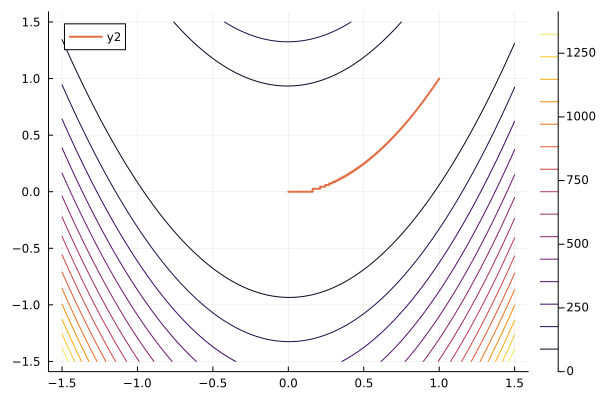

In [23]:
ezcontour(-1.5:0.01:1.5, -1.5:0.01:1.5, 
MultivariateProblems.UnconstrainedProblems.examples["Rosenbrock"].f)
plot!(map(first,histx),map(x->x[2], histx), linewidth=2)

## Another function

In [21]:
V = qr(randn(2,2)).Q # compute the full QR factorization to get a random orthogonal matrix
Q = V*Diagonal([10,1e-2])*V'       # produce a mildly ill-conditioned Q
f = x -> (1/2*x'*Q*x)[1] + 0.001
g = x -> Q*x
fg = x -> (f(x), g(x))
fg([1.0,1.0])

(4.4080634159116805, [-0.5520188420679948, 9.366145673891355])

In [22]:
histx = Vector{Vector{Float64}}()
x,fx,gx,hist = exact_gradient_descent(fg, [1.0,1.0]; 
    maxiter=1000, histx=histx)

    iter        val     normg     fdiff
       1   4.41e+00  9.37e+00       Inf
       2   6.59e-03  1.06e-02  4.40e+00
       3   5.53e-03  9.43e-03  1.06e-03
       4   5.24e-03  7.13e-02  2.85e-04
       5   4.97e-03  8.83e-03  2.67e-04
       6   4.72e-03  6.68e-02  2.50e-04
       7   4.49e-03  8.28e-03  2.34e-04
       8   4.27e-03  6.26e-02  2.20e-04
       9   4.06e-03  7.76e-03  2.06e-04
      10   3.87e-03  5.87e-02  1.93e-04
      11   3.69e-03  7.27e-03  1.81e-04
      12   3.52e-03  5.50e-02  1.69e-04
      13   3.36e-03  6.81e-03  1.59e-04
      14   3.21e-03  5.15e-02  1.49e-04
      15   3.08e-03  6.38e-03  1.39e-04
      16   2.94e-03  4.83e-02  1.31e-04
      17   2.82e-03  5.98e-03  1.22e-04
      18   2.71e-03  4.52e-02  1.15e-04
      19   2.60e-03  5.61e-03  1.07e-04
      20   2.50e-03  4.24e-02  1.01e-04
      21   2.41e-03  5.25e-03  9.43e-05
      22   2.32e-03  3.97e-02  8.84e-05
      23   2.23e-03  4.92e-03  8.28e-05
      24   2.16e-03  3.72e-02  7.76e-05


     256   1.00e-03  1.99e-05  2.21e-11
     257   1.00e-03  2.46e-06  2.07e-11
     258   1.00e-03  1.86e-05  1.94e-11
     259   1.00e-03  2.31e-06  1.82e-11
     260   1.00e-03  1.74e-05  1.70e-11
     261   1.00e-03  2.16e-06  1.60e-11
     262   1.00e-03  1.63e-05  1.50e-11
     263   1.00e-03  2.03e-06  1.40e-11
     264   1.00e-03  1.53e-05  1.31e-11
     265   1.00e-03  1.90e-06  1.23e-11
     266   1.00e-03  1.43e-05  1.15e-11
     267   1.00e-03  1.78e-06  1.08e-11
     268   1.00e-03  1.34e-05  1.01e-11
     269   1.00e-03  1.67e-06  9.49e-12
     270   1.00e-03  1.26e-05  8.90e-12
     271   1.00e-03  1.56e-06  8.34e-12
     272   1.00e-03  1.18e-05  7.81e-12
     273   1.00e-03  1.46e-06  7.32e-12
     274   1.00e-03  1.11e-05  6.86e-12
     275   1.00e-03  1.37e-06  6.43e-12
     276   1.00e-03  1.04e-05  6.03e-12
     277   1.00e-03  1.29e-06  5.65e-12
     278   1.00e-03  9.72e-06  5.29e-12
     279   1.00e-03  1.20e-06  4.96e-12
     280   1.00e-03  9.11e-06  4.65e-12


([9.905772905131612e-7, 5.962666255226629e-8], 0.001000000000004924, [9.832109549886886e-9, 1.8225690746731869e-9], [4.4080634159116805 0.006587343640397258 … 0.0010000000000052551 0.001000000000004924; 9.366145673891355 0.0105527337002336 … 7.939216199626589e-8 9.832109549886886e-9])

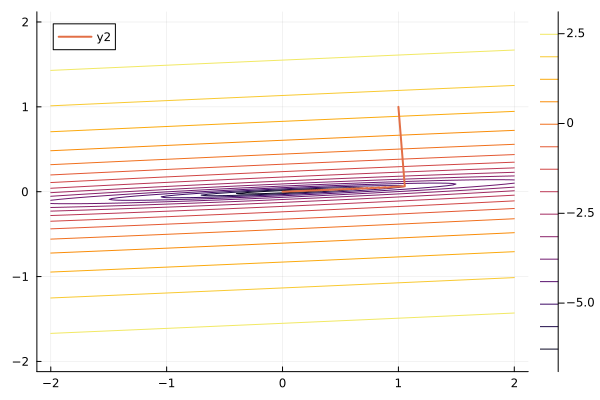

In [23]:
ezcontour(-2:0.01:2, -2:0.01:2, x -> log(f(x)))
plot!(map(first,histx),map(x->x[2], histx), linewidth=2)